In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

from transformers import *

from tqdm import tqdm
tqdm.pandas()

C:\Users\jerry\.conda\envs\master\lib\site-packages\tqdm\std.py:656: FutureWarning:

The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version



In [ ]:
data_1 = pd.read_csv('../data/ArticlesData.csv')

In [16]:
data_2 = pd.read_csv('../data/external_2.csv')

In [3]:
data_3 = pd.read_csv('../data/external_3.csv')

In [17]:
data_1

Unnamed: 0                                              claim  \
0               0  A line from George Orwell's novel 1984 predict...   
1               1  Maine legislature candidate Leslie Gibson insu...   
2               2  A 17-year-old girl named Alyssa Carson is bein...   
3               3  In 1988 author Roald Dahl penned an open lette...   
4               4  When it comes to fighting terrorism, "Another ...   
5               5  Rhode Island is "almost dead last" among North...   
6               6  The poorest counties in the U.S. are in Appala...   
7               7  Koch Industries paid the legal fees of George ...   
8               8  "Minnesota, Michigan, Iowa already have 70 mph...   
9               9  "FBI Uniform Crime Report for 2016 shows more ...   
10             10   "Pelosi Sinks to New Low, Tells Dems: If You ...   
11             11  Socialist teachers at South Charlotte Middle S...   
12             12  Says that in the U.S. Capitol, "Stephen F. Aus...   
13             13       NASA Has Just Confirmed Earth Has A New Moon   
14             14  "We are always going to need architects, docto...   
15             15  "Justin Amash is rated Michigan’s No. 1 conser...   
16             16   BREAKING: NFL Owner Listens to Trump, Fires P...   
17             17  Says one year ago, "no cities in the South had...   
18             18  Says North Carolina Republican Senate candidat...   
19             19  Says "the mandate is 71 times that a child’s b...   
20             20  Mergers and integration in agribusiness "squee...   
21             21  Says the Human Rights Campaign is secretly funded   
22             22  A scientific study demonstrated that conspirac...   
23             23  Eggs and popcorn kernels can be cooked by plac...   
24             24  Says Bernie Sanders "was against the auto bail...   
25             25  Congress has approved the creation of a taxpay...   
26             26  In 2008, "candidate Obama, he's not even presi...   
27             27  "This war has been going on for over five year...   
28             28  "Chicago now has City ID Cards which allow ill...   
29             29  The Wharton School wrote an open letter to Don...   
...           ...                                                ...   
15525       15525  "We have an 80 percent graduation rate in high...   
15526       15526  "Democrat Jon Ossoff would be a disaster in Co...   
15527       15527   Reddit postings show the shooter in Jacksonvi...   
15528       15528  “We’re making more than  ever off oil and gas ...   
15529       15529  "The government is trying to now close the Lin...   
15530       15530  The Trump administration blocked public access...   
15531       15531  WalMart has put all their Christian employees ...   
15532       15532  Sen. Joe Lieberman's "home state has a public ...   
15533       15533  “These are the same people that said Saddam Hu...   
15534       15534  "One-third of the counties — think of it, one-...   
15535       15535  Says Rep. Martha McSally "is a #FlipFlopBorder...   
15536       15536  Californians pay "the highest electricity bill...   
15537       15537  Says the Steele dossier "was responsible for s...   
15538       15538  Donald Trump dropped out of the presidential r...   
15539       15539  A photograph shows a musher riding over snowle...   
15540       15540  "5.7 million -- that’s how many illegal immigr...   
15541       15541  "Evidence surfaces of Vatican funding caravans...   
15542       15542   "The average premium across this country has ...   
15543       15543  At an Arizona town hall event, Sen. Jeff Flake...   
15544       15544  A photograph shows Donald Trump, Muhammad Ali,...   
15545       15545  A photograph shows a man mowing his lawn durin...   
15546       15546  President Obama signed a law permanently prote...   
15547       15547  "I haven’t really proposed (phasing out aid to...   
15548       15548  Says Aaron Rodgers "is not t

In [20]:
data_2

id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
5          5  Jackie Mason: Hollywood Would Love Trump if He...   
6          6  Life: Life Of Luxury: Elton John’s 6 Favorite ...   
7          7  Benoît Hamon Wins French Socialist Party’s Pre...   
8          8  Excerpts From a Draft Script for Donald Trump’...   
9          9  A Back-Channel Plan for Ukraine and Russia, Co...   
10        10  Obama’s Organizing for Action Partners with So...   
11        11  BBC Comedy Sketch "Real Housewives of ISIS" Ca...   
12        12  Russian Researchers Discover Secret Nazi Milit...   
13        13  US Officials See No Link Between Trump and Russia   
14        14  Re: Yes, There Are Paid Government Trolls On S...   
15        15  In Major League Soccer, Argentines Find a Home...   
16        16  Wells Fargo Chief Abruptly Steps Down - The Ne...   
17        17  Anonymous Donor Pays $2.5 Million To Release E...   
18        18                          FBI Closes In On Hillary!   
19        19  Chuck Todd: ’BuzzFeed Did Donald Trump a Polit...   
20        20  News: Hope For The GOP: A Nude Paul Ryan Has J...   
21        21  Monica Lewinsky, Clinton Sex Scandal Set for ’...   
22        22  Rob Reiner: Trump Is ’Mentally Unstable’ - Bre...   
23        23  Massachusetts Cop’s Wife Busted for Pinning Fa...   
24        24  Abortion Pill Orders Rise in 7 Latin American ...   
25        25  Nukes and the UN: a Historic Treaty to Ban Nuc...   
26        26  EXCLUSIVE: Islamic State Supporters Vow to ‘Sh...   
27        27  Humiliated Hillary Tries To Hide What Camera C...   
28        28  Andrea Tantaros of Fox News Claims Retaliation...   
29        29  How Hillary Clinton Became a Hawk - The New Yo...   
...      ...                                                ...   
20770  20770  HUMA ABEDIN SWORE UNDER OATH SHE GAVE UP ‘ALL ...   
20771  20771                                                NaN   
20772  20772                                                NaN   
20773  20773  Australia to hunt down anti-vax nurses and pro...   
20774  20774  Government Report: Islamists Building ’Paralle...   
20775  20775  How this WWII airman is helping veterans heal ...   
20776  20776  Trump Campaign Says Hillary Supporter Tried As...   
20777  20777  Editor of Austria’s Largest Paper Charged with...   
20778  20778  This Is a Jobs Report That Democrats Can Boast...   
20779  20779  Christians in 2017 ’Most Persecuted Group in t...   
20780  20780  Florida Woman Charged in Death of Infant in ‘C...   
20781  20781  Time is Running Out to Stop Kratom Ban – Need ...   
20782  20782  The Fix Is In: NBC Affiliate Accidentally Post...   
20783  20783  Samsung, Kim Jong-un, Rex Tillerson: Your Morn...   
20784  20784  Comment on World Heaves Sigh of Relief after T...   
20785  20785  Ann Coulter: How to Provide Universal Health C...   
20786  20786  Government Forces Advancing at Damascus-Aleppo...   
20787  20787  Sally Yates Won’t Say If Trump Was Wiretapped ...   
20788  20788  Maine’s Gov. LePage Threatens To ‘Investigate’...   
20789  20789  Sen. McConnell: The Supreme Court Vacancy Was ...   
20790  20790  Nikki Haley Blasts U.N. Human Rights Office fo...   
20791  20791  Lawyer Who Kept Hillary Campaign Chief Out of ...   
20792  20792  Jakarta Bombing Kills Three Police Officers, L...   
20793  20793  Idiot Who Destroyed Trump Hollywood Star Gets ...   
20794  20794  Trump: Putin ’Very Smart’ to Not Retaliate ove...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach

In [5]:
data_3['label'].value_counts()

unrelated    219313
agreed        92973
disagreed      8266
Name: label, dtype: int64

In [4]:
data_1['claim'][0]

"A line from George Orwell's novel 1984 predicts the power of smartphones."

In [6]:
x

0

In [75]:
index = 14

In [76]:
print(data_1['claim'][index])

"We are always going to need architects, doctors, we’re going to need professionals with four-year degrees. But 65 to 70 percent of the people in Missouri don’t have degrees."


In [77]:
data_1['label'][index]

2

# External 2

In [22]:
data_2['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [29]:
data_2['title']

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                        Why the Truth Might Get You Fired
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
5        Jackie Mason: Hollywood Would Love Trump if He...
6        Life: Life Of Luxury: Elton John’s 6 Favorite ...
7        Benoît Hamon Wins French Socialist Party’s Pre...
8        Excerpts From a Draft Script for Donald Trump’...
9        A Back-Channel Plan for Ukraine and Russia, Co...
10       Obama’s Organizing for Action Partners with So...
11       BBC Comedy Sketch "Real Housewives of ISIS" Ca...
12       Russian Researchers Discover Secret Nazi Milit...
13       US Officials See No Link Between Trump and Russia
14       Re: Yes, There Are Paid Government Trolls On S...
15       In Major League Soccer, Argentines Find a Home...
16       Wells Fargo Chief Abruptly Steps Down - The Ne.

# Time

In [3]:
data_1['Year'] = data_1['date'].apply(lambda x: x[:4])
data_1['Month'] = data_1['date'].apply(lambda x: x[5:7])
data_1['Day'] = data_1['date'].apply(lambda x: x[8:])

In [4]:
data_1.groupby('Year').mean()

Unnamed: 0            id     label
Year                                      
1986  13410.000000  14770.000000  1.000000
2000   3911.000000   4311.000000  0.000000
2004  13394.000000  14751.000000  1.000000
2007   8472.060606   9333.757576  1.045455
2008   8122.047445   8948.802920  0.905109
2009   7422.860360   8177.995495  0.792793
2010   7594.760989   8366.967033  0.840659
2011   7807.049020   8600.823529  0.866013
2012   7616.440741   8391.522222  0.859259
2013   7548.575130   8316.480570  0.878238
2014   7844.518155   8643.229637  0.836114
2015   7869.202716   8669.771096  0.861300
2016   7732.066361   8519.081186  0.619132
2017   7781.505498   8573.234153  0.508732
2018   7789.607439   8582.344394  0.535189
2019   7847.270115   8645.627075  0.510856

In [5]:
data_1['count'] = 1

In [20]:
px.bar(data_1, x = 'Year', y = 'count', labels = 'label')

In [18]:
px.bar

<function plotly.express._chart_types.bar(data_frame, x=None, y=None, color=None, facet_row=None, facet_col=None, hover_name=None, hover_data=None, text=None, error_x=None, error_x_minus=None, error_y=None, error_y_minus=None, animation_frame=None, animation_group=None, category_orders={}, labels={}, color_discrete_sequence=None, color_discrete_map={}, color_continuous_scale=None, range_color=None, color_continuous_midpoint=None, opacity=None, orientation='v', barmode='relative', log_x=False, log_y=False, range_x=None, range_y=None, title=None, template=None, width=None, height=None)>

# Claim Analysis

In [3]:
sentences = data_1.claim.values
sentences = ['[CLS] ' + sentence + ' [SEP]' for sentence in sentences]

In [4]:
labels = data_1.label.values

In [5]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased', do_lower_case = False)

I1108 21:15:14.208396 18004 tokenization_utils.py:373] loading file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-cased-vocab.txt from cache at C:\Users\SSSpi\.cache\torch\transformers\5e8a2b4893d13790ed4150ca1906be5f7a03d6c4ddf62296c383f6db42814db2.e13dbb970cb325137104fb2e5f36fe865f27746c6b526f6352861b1980eb80b1


In [16]:
claims = data_1['claim'].progress_apply(lambda x: tokenizer.encode(x, add_special_tokens = True))

  9%|██████▍                                                                    | 1337/15555 [00:00<00:07, 1843.62it/s]W1108 21:27:53.858491 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1053 > 512). Running this sequence through the model will result in indexing errors
W1108 21:27:53.883990 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (600 > 512). Running this sequence through the model will result in indexing errors
W1108 21:27:53.909489 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (668 > 512). Running this sequence through the model will result in indexing errors
 18%|█████████████▍                                                             | 2783/15555 [00:01<00:06, 2042.06it/s]W1108 21:27:54.572993 18004 tokenization_utils.py:

 69%|██████████████████████████████████████████████████▉                       | 10702/15555 [00:05<00:02, 1834.10it/s]W1108 21:27:58.454567 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (660 > 512). Running this sequence through the model will result in indexing errors
W1108 21:27:58.524067 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1472 > 512). Running this sequence through the model will result in indexing errors
 78%|██████████████████████████████████████████████████████████                | 12201/15555 [00:06<00:01, 2122.85it/s]W1108 21:27:59.177071 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (577 > 512). Running this sequence through the model will result in indexing errors
W1108 21:27:59.247568 18004 tokenization_utils.py:

In [17]:
claims_lens = [len(claim) for claim in claims]
claims_lens = pd.DataFrame(claims_lens)

In [25]:
claims_lens['count'] = 1
claims_lens = claims_lens.rename(columns = {0: 'lengths'})

In [26]:
fig = px.histogram(claims_lens, x = 'lengths', y = 'count')

In [27]:
fig.show()

In [33]:
(claims_lens['lengths'] < 100).value_counts()

True     15089
False      466
Name: lengths, dtype: int64

In [35]:
temp = data_1[claims_lens['lengths'] > 100]

In [37]:
temp['claim'][119]

"Stem cells can be harvested from baby teeth, so it's a good idea to preserve them in private stem cell banks for future use in medical treatments.\n\n\t\t\t\t\n\t\t\t\t\t\n\n\t\t\t\t\t\tSee\xa0Example(s)\n\n\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\tIs this true? Doctors Are Urging Parents Everywhere To Keep Their Kids’ Baby Teeth\n\nThere's an article going around Facebook claiming valuable stem cells can be salvaged from our baby teeth and, when preserved correctly, can provide a life-saving solution.\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tCollected via e-mail, August 2016"

## Articles

In [9]:
articles_0 = data_1['0'].progress_apply(lambda x: tokenizer.encode(x, add_special_tokens = True))

  0%|                                                                                        | 0/15555 [00:00<?, ?it/s]W1108 21:15:32.230493 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (632 > 512). Running this sequence through the model will result in indexing errors
W1108 21:15:32.261490 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1035 > 512). Running this sequence through the model will result in indexing errors
W1108 21:15:32.285491 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1581 > 512). Running this sequence through the model will result in indexing errors
W1108 21:15:32.369493 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4532 > 512). R

W1108 21:15:33.260990 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1116 > 512). Running this sequence through the model will result in indexing errors
W1108 21:15:33.277491 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (738 > 512). Running this sequence through the model will result in indexing errors
  0%|▎                                                                              | 53/15555 [00:01<08:43, 29.63it/s]W1108 21:15:33.592031 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (825 > 512). Running this sequence through the model will result in indexing errors
W1108 21:15:33.607000 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (844 > 512). Run

W1108 21:15:34.700992 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (820 > 512). Running this sequence through the model will result in indexing errors
W1108 21:15:34.722490 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (629 > 512). Running this sequence through the model will result in indexing errors
W1108 21:15:34.936492 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (13120 > 512). Running this sequence through the model will result in indexing errors
  1%|▌                                                                             | 102/15555 [00:02<06:57, 37.06it/s]W1108 21:15:35.117990 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (12480 > 512). 

  1%|▋                                                                             | 143/15555 [00:03<07:15, 35.37it/s]W1108 21:15:36.446492 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (33542 > 512). Running this sequence through the model will result in indexing errors
W1108 21:15:36.503493 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2604 > 512). Running this sequence through the model will result in indexing errors
  1%|▋                                                                             | 147/15555 [00:04<13:28, 19.05it/s]W1108 21:15:36.526491 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1605 > 512). Running this sequence through the model will result in indexing errors
W1108 21:15:36.583045 18004 tokenization_utils.

W1108 21:15:37.945678 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (513 > 512). Running this sequence through the model will result in indexing errors
  1%|▉                                                                             | 186/15555 [00:05<09:07, 28.09it/s]W1108 21:15:37.982707 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1065 > 512). Running this sequence through the model will result in indexing errors
W1108 21:15:38.009195 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1695 > 512). Running this sequence through the model will result in indexing errors
W1108 21:15:38.022181 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (572 > 512). Ru

W1108 21:15:41.366714 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (813 > 512). Running this sequence through the model will result in indexing errors
  2%|█▎                                                                            | 266/15555 [00:09<22:34, 11.29it/s]W1108 21:15:41.385679 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (673 > 512). Running this sequence through the model will result in indexing errors
W1108 21:15:41.441180 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2604 > 512). Running this sequence through the model will result in indexing errors
W1108 21:15:41.494177 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2031 > 512). Ru

W1108 21:15:43.053677 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (572 > 512). Running this sequence through the model will result in indexing errors
W1108 21:15:43.084177 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1652 > 512). Running this sequence through the model will result in indexing errors
  2%|█▌                                                                            | 311/15555 [00:10<12:05, 21.01it/s]W1108 21:15:43.106677 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (638 > 512). Running this sequence through the model will result in indexing errors
W1108 21:15:43.122177 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (577 > 512). Run

W1108 21:15:44.040739 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2132 > 512). Running this sequence through the model will result in indexing errors
W1108 21:15:44.059181 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (939 > 512). Running this sequence through the model will result in indexing errors
W1108 21:15:44.069233 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (536 > 512). Running this sequence through the model will result in indexing errors
W1108 21:15:44.106717 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2279 > 512). Running this sequence through the model will result in indexing errors
  2%|█▊                                           

W1108 21:15:45.591183 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (787 > 512). Running this sequence through the model will result in indexing errors
W1108 21:15:46.225180 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (25394 > 512). Running this sequence through the model will result in indexing errors
  3%|██                                                                            | 407/15555 [00:14<19:36, 12.88it/s]W1108 21:15:46.265179 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (938 > 512). Running this sequence through the model will result in indexing errors
W1108 21:15:46.316679 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1330 > 512). R

W1108 21:15:50.371217 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (13120 > 512). Running this sequence through the model will result in indexing errors
  3%|██▍                                                                           | 498/15555 [00:18<13:16, 18.91it/s]W1108 21:15:50.398756 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1618 > 512). Running this sequence through the model will result in indexing errors
W1108 21:15:50.413269 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (933 > 512). Running this sequence through the model will result in indexing errors
W1108 21:15:50.429255 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (895 > 512). R

W1108 21:15:51.947717 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (997 > 512). Running this sequence through the model will result in indexing errors
W1108 21:15:51.967220 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1017 > 512). Running this sequence through the model will result in indexing errors
W1108 21:15:51.984215 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1406 > 512). Running this sequence through the model will result in indexing errors
W1108 21:15:52.017218 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2233 > 512). Running this sequence through the model will result in indexing errors
  4%|██▊                                         

  4%|██▉                                                                           | 594/15555 [00:20<08:38, 28.87it/s]W1108 21:15:53.203717 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1742 > 512). Running this sequence through the model will result in indexing errors
W1108 21:15:53.258248 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3474 > 512). Running this sequence through the model will result in indexing errors
W1108 21:15:53.274726 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1012 > 512). Running this sequence through the model will result in indexing errors
W1108 21:15:53.567219 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (35803 > 512).

W1108 21:15:56.986276 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1381 > 512). Running this sequence through the model will result in indexing errors
W1108 21:15:57.026215 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3035 > 512). Running this sequence through the model will result in indexing errors
W1108 21:15:57.044217 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (682 > 512). Running this sequence through the model will result in indexing errors
  4%|███▍                                                                          | 679/15555 [00:24<08:27, 29.33it/s]W1108 21:15:57.105718 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2869 > 512). R

W1108 21:15:58.322214 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (649 > 512). Running this sequence through the model will result in indexing errors
W1108 21:15:58.335713 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (588 > 512). Running this sequence through the model will result in indexing errors
  5%|███▋                                                                          | 725/15555 [00:26<07:02, 35.06it/s]W1108 21:15:58.357227 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (594 > 512). Running this sequence through the model will result in indexing errors
W1108 21:15:58.375714 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (723 > 512). Runn

W1108 21:16:00.566717 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (17194 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:00.586218 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (802 > 512). Running this sequence through the model will result in indexing errors
  5%|███▉                                                                          | 777/15555 [00:28<17:30, 14.07it/s]W1108 21:16:00.608231 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (804 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:00.644720 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1445 > 512). R

  5%|████▏                                                                         | 825/15555 [00:29<07:02, 34.84it/s]W1108 21:16:01.930718 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1193 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:01.995214 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2496 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:02.034758 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1147 > 512). Running this sequence through the model will result in indexing errors
  5%|████▏                                                                         | 830/15555 [00:29<06:47, 36.12it/s]W1108 21:16:02.062216 18004 tokenization_utils.p

  6%|████▍                                                                         | 878/15555 [00:30<05:45, 42.46it/s]W1108 21:16:03.043213 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1133 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:03.061752 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (603 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:03.072718 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (644 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:03.090718 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (830 > 512). Run

W1108 21:16:04.624258 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (8435 > 512). Running this sequence through the model will result in indexing errors
  6%|████▋                                                                         | 927/15555 [00:32<09:02, 26.97it/s]W1108 21:16:04.640720 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (523 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:04.655716 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (543 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:04.881718 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (13690 > 512). R

W1108 21:16:07.561213 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (825 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:07.584272 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (628 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:07.614753 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1393 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:07.633218 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (744 > 512). Running this sequence through the model will result in indexing errors
  7%|█████                                         

W1108 21:16:08.915752 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1081 > 512). Running this sequence through the model will result in indexing errors
  7%|█████▎                                                                       | 1062/15555 [00:36<07:45, 31.14it/s]W1108 21:16:08.941214 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (984 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:08.973714 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1511 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:08.992713 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1030 > 512). R

  7%|█████▌                                                                       | 1112/15555 [00:38<06:03, 39.74it/s]W1108 21:16:10.301712 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1700 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:10.335218 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2033 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:10.403215 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1894 > 512). Running this sequence through the model will result in indexing errors
  7%|█████▌                                                                       | 1118/15555 [00:38<05:48, 41.38it/s]W1108 21:16:10.429254 18004 tokenization_utils.p

  8%|█████▊                                                                       | 1171/15555 [00:39<05:07, 46.75it/s]W1108 21:16:11.531718 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (787 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:11.575719 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1972 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:11.595717 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1270 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:11.798717 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (8682 > 512). R

  8%|██████                                                                       | 1218/15555 [00:41<10:42, 22.31it/s]W1108 21:16:13.743721 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1812 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:13.770217 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1021 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:13.798216 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1250 > 512). Running this sequence through the model will result in indexing errors
  8%|██████                                                                       | 1226/15555 [00:41<08:24, 28.39it/s]W1108 21:16:13.832718 18004 tokenization_utils.p

W1108 21:16:16.825720 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (614 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:16.839251 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (803 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:16.850219 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (557 > 512). Running this sequence through the model will result in indexing errors
  8%|██████▍                                                                      | 1311/15555 [00:44<08:11, 28.99it/s]W1108 21:16:16.889713 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1552 > 512). Run

  9%|██████▋                                                                      | 1353/15555 [00:46<12:23, 19.10it/s]W1108 21:16:18.561715 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (786 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:18.631753 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4406 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:18.662759 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1714 > 512). Running this sequence through the model will result in indexing errors
  9%|██████▋                                                                      | 1356/15555 [00:46<11:32, 20.51it/s]W1108 21:16:18.818225 18004 tokenization_utils.py

W1108 21:16:19.831216 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (607 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:19.849216 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1025 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:19.876219 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1453 > 512). Running this sequence through the model will result in indexing errors
  9%|██████▉                                                                      | 1394/15555 [00:47<06:48, 34.68it/s]W1108 21:16:19.930718 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2441 > 512). R

W1108 21:16:21.491715 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (905 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:21.531215 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1327 > 512). Running this sequence through the model will result in indexing errors
  9%|███████▏                                                                     | 1441/15555 [00:49<07:56, 29.62it/s]W1108 21:16:21.672215 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4257 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:22.095719 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (21152 > 512). 

 10%|███████▎                                                                     | 1481/15555 [00:51<07:58, 29.40it/s]W1108 21:16:23.394217 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (736 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:23.422215 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (935 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:23.459718 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1361 > 512). Running this sequence through the model will result in indexing errors
 10%|███████▍                                                                     | 1491/15555 [00:51<06:18, 37.11it/s]W1108 21:16:23.496718 18004 tokenization_utils.py:

 10%|███████▌                                                                     | 1527/15555 [00:53<12:00, 19.47it/s]W1108 21:16:25.860719 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (906 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:25.872253 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (659 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:25.886253 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (798 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:26.114213 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (12440 > 512). Ru

W1108 21:16:28.168715 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (958 > 512). Running this sequence through the model will result in indexing errors
 10%|███████▊                                                                     | 1567/15555 [00:55<11:11, 20.83it/s]W1108 21:16:28.204716 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (788 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:28.232216 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1341 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:28.242716 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (516 > 512). Run

W1108 21:16:29.304220 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (871 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:29.357716 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2624 > 512). Running this sequence through the model will result in indexing errors
 10%|███████▉                                                                     | 1610/15555 [00:57<08:00, 29.03it/s]W1108 21:16:29.374213 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (710 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:29.409217 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1294 > 512). Ru

W1108 21:16:30.984220 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1409 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:31.024718 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2672 > 512). Running this sequence through the model will result in indexing errors
 11%|████████▏                                                                    | 1651/15555 [00:58<10:45, 21.55it/s]W1108 21:16:31.051220 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (720 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:31.312713 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (13542 > 512). 

W1108 21:16:34.089220 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (8682 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:34.118720 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1361 > 512). Running this sequence through the model will result in indexing errors
 11%|████████▋                                                                    | 1746/15555 [01:01<08:50, 26.03it/s]W1108 21:16:34.144755 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1639 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:34.371217 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (13072 > 512).

W1108 21:16:36.394215 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (23425 > 512). Running this sequence through the model will result in indexing errors
 11%|████████▊                                                                    | 1783/15555 [01:04<20:10, 11.37it/s]W1108 21:16:36.499720 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (5103 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:36.516716 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (666 > 512). Running this sequence through the model will result in indexing errors
 11%|████████▊                                                                    | 1785/15555 [01:04<18:17, 12.55it/s]W1108 21:16:36.540218 18004 tokenization_utils.p

 12%|█████████▎                                                                   | 1874/15555 [01:07<13:57, 16.33it/s]W1108 21:16:39.584216 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (7380 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:39.603714 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (532 > 512). Running this sequence through the model will result in indexing errors
 12%|█████████▎                                                                   | 1877/15555 [01:07<16:32, 13.79it/s]W1108 21:16:39.633727 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1175 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:39.769216 18004 tokenization_utils.py

 12%|█████████▌                                                                   | 1921/15555 [01:09<09:23, 24.18it/s]W1108 21:16:41.660215 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1059 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:42.219716 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (35075 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:42.267217 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1808 > 512). Running this sequence through the model will result in indexing errors
 12%|█████████▌                                                                   | 1926/15555 [01:10<15:21, 14.79it/s]W1108 21:16:42.305253 18004 tokenization_utils.

W1108 21:16:44.109716 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1460 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:44.135717 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (995 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:44.150715 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (758 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:44.173217 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (637 > 512). Running this sequence through the model will result in indexing errors
 13%|█████████▊                                    

W1108 21:16:45.486718 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1042 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:45.504218 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (708 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:45.523720 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (931 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:45.547719 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1033 > 512). Running this sequence through the model will result in indexing errors
 13%|█████████▉                                   

W1108 21:16:49.537718 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (576 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:49.563220 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1128 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:49.597714 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (871 > 512). Running this sequence through the model will result in indexing errors
 14%|██████████▍                                                                  | 2104/15555 [01:17<09:34, 23.41it/s]W1108 21:16:49.848218 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (16241 > 512). R

 14%|██████████▋                                                                  | 2154/15555 [01:18<07:25, 30.08it/s]W1108 21:16:51.240213 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (5129 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:51.288215 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2815 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:51.318720 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1271 > 512). Running this sequence through the model will result in indexing errors
 14%|██████████▋                                                                  | 2159/15555 [01:19<07:57, 28.06it/s]W1108 21:16:51.344254 18004 tokenization_utils.p

 14%|██████████▉                                                                  | 2198/15555 [01:20<06:16, 35.46it/s]W1108 21:16:52.364716 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (923 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:52.383249 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (705 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:52.399750 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (627 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:52.429719 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1112 > 512). Run

W1108 21:16:53.653213 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (601 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:53.695220 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1798 > 512). Running this sequence through the model will result in indexing errors
 14%|███████████▏                                                                 | 2251/15555 [01:21<06:37, 33.50it/s]W1108 21:16:53.716220 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (763 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:53.760719 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2235 > 512). Ru

W1108 21:16:54.622719 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (601 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:54.694216 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3410 > 512). Running this sequence through the model will result in indexing errors
 15%|███████████▎                                                                 | 2294/15555 [01:22<05:08, 43.01it/s]W1108 21:16:54.724255 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1945 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:54.826725 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (6038 > 512). R

W1108 21:16:56.168720 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3088 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:56.246257 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4719 > 512). Running this sequence through the model will result in indexing errors
 15%|███████████▌                                                                 | 2341/15555 [01:24<09:34, 22.99it/s]W1108 21:16:56.264718 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (965 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:56.302254 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1611 > 512). R

W1108 21:16:58.585752 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1582 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:58.602719 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (863 > 512). Running this sequence through the model will result in indexing errors
 15%|███████████▊                                                                 | 2386/15555 [01:26<09:40, 22.68it/s]W1108 21:16:58.628715 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1014 > 512). Running this sequence through the model will result in indexing errors
W1108 21:16:58.728216 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (5161 > 512). R

W1108 21:17:01.749214 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (747 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:01.804214 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2073 > 512). Running this sequence through the model will result in indexing errors
 16%|████████████▏                                                                | 2465/15555 [01:29<11:23, 19.16it/s]W1108 21:17:01.886713 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3134 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:02.025720 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (5573 > 512). R

W1108 21:17:03.903213 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3636 > 512). Running this sequence through the model will result in indexing errors
 16%|████████████▍                                                                | 2515/15555 [01:31<10:21, 20.97it/s]W1108 21:17:03.931715 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (850 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:03.944714 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (538 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:03.982216 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1215 > 512). Ru

W1108 21:17:06.496215 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1349 > 512). Running this sequence through the model will result in indexing errors
 16%|████████████▋                                                                | 2556/15555 [01:34<14:45, 14.68it/s]W1108 21:17:06.522718 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (829 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:06.554219 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (919 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:06.575219 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (679 > 512). Run

 17%|████████████▊                                                                | 2597/15555 [01:35<08:37, 25.04it/s]W1108 21:17:08.228218 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1861 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:08.256217 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1104 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:08.529218 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (15124 > 512). Running this sequence through the model will result in indexing errors
 17%|████████████▉                                                                | 2603/15555 [01:36<09:46, 22.07it/s]W1108 21:17:08.567717 18004 tokenization_utils.

 17%|█████████████▏                                                               | 2653/15555 [01:38<07:51, 27.39it/s]W1108 21:17:10.345717 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2140 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:10.364217 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (835 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:10.501717 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (8758 > 512). Running this sequence through the model will result in indexing errors
 17%|█████████████▏                                                               | 2657/15555 [01:38<08:41, 24.73it/s]W1108 21:17:10.612217 18004 tokenization_utils.py

 18%|█████████████▌                                                               | 2746/15555 [01:41<08:30, 25.09it/s]W1108 21:17:13.728766 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2404 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:13.740717 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (724 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:13.758761 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1090 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:13.782270 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2083 > 512). R

W1108 21:17:16.313824 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1052 > 512). Running this sequence through the model will result in indexing errors
 18%|██████████████                                                               | 2845/15555 [01:44<06:44, 31.41it/s]W1108 21:17:16.329324 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (819 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:16.340825 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (648 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:16.395323 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3473 > 512). Ru

W1108 21:17:17.131623 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (708 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:17.147179 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1055 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:17.163622 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1143 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:17.279669 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (8934 > 512). Running this sequence through the model will result in indexing errors
 19%|██████████████▎                             

W1108 21:17:18.402621 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1846 > 512). Running this sequence through the model will result in indexing errors
 19%|██████████████▌                                                              | 2937/15555 [01:46<06:00, 35.04it/s]W1108 21:17:18.485123 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3970 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:18.503166 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (942 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:18.528165 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1315 > 512). R

W1108 21:17:20.869128 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (744 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:20.887614 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1114 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:20.906073 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (923 > 512). Running this sequence through the model will result in indexing errors
 19%|██████████████▉                                                              | 3027/15555 [01:48<05:46, 36.14it/s]W1108 21:17:21.034071 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (8803 > 512). Ru

W1108 21:17:22.061073 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1384 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:22.202575 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (10660 > 512). Running this sequence through the model will result in indexing errors
 20%|███████████████▏                                                             | 3066/15555 [01:49<08:33, 24.33it/s]W1108 21:17:22.239625 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2076 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:22.273073 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1433 > 512).

W1108 21:17:24.064612 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4547 > 512). Running this sequence through the model will result in indexing errors
 20%|███████████████▍                                                             | 3108/15555 [01:51<11:09, 18.60it/s]W1108 21:17:24.095073 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1307 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:24.106608 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (704 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:24.118072 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (769 > 512). Ru

 20%|███████████████▌                                                             | 3151/15555 [01:52<04:32, 45.54it/s]W1108 21:17:24.916616 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (717 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:24.946614 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1738 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:24.972609 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1712 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:25.020076 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2360 > 512). R

 21%|███████████████▊                                                             | 3206/15555 [01:54<05:21, 38.36it/s]W1108 21:17:26.295743 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (917 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:26.328226 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2362 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:26.341691 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (652 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:26.353228 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (700 > 512). Run

W1108 21:17:27.661189 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (520 > 512). Running this sequence through the model will result in indexing errors
 21%|████████████████                                                             | 3249/15555 [01:55<07:13, 28.37it/s]W1108 21:17:27.682187 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (733 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:27.714188 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1350 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:27.731191 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (603 > 512). Run

W1108 21:17:29.025225 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (879 > 512). Running this sequence through the model will result in indexing errors
 21%|████████████████▎                                                            | 3288/15555 [01:56<07:17, 28.06it/s]W1108 21:17:29.089692 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2017 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:29.131689 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2232 > 512). Running this sequence through the model will result in indexing errors
 21%|████████████████▎                                                            | 3291/15555 [01:56<07:16, 28.09it/s]W1108 21:17:29.173689 18004 tokenization_utils.py

 21%|████████████████▍                                                            | 3330/15555 [01:58<07:39, 26.60it/s]W1108 21:17:30.697187 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (14364 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:30.743190 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2422 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:30.759187 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (721 > 512). Running this sequence through the model will result in indexing errors
 21%|████████████████▌                                                            | 3334/15555 [01:58<09:47, 20.81it/s]W1108 21:17:30.787186 18004 tokenization_utils.p

W1108 21:17:32.007753 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1406 > 512). Running this sequence through the model will result in indexing errors
 22%|████████████████▋                                                            | 3376/15555 [01:59<06:37, 30.62it/s]W1108 21:17:32.044255 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (701 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:32.079756 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1706 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:32.104248 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1017 > 512). R

 22%|█████████████████▏                                                           | 3467/15555 [02:02<07:11, 28.04it/s]W1108 21:17:34.716753 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (9458 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:34.744287 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2173 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:34.845249 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (10103 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:34.857285 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (777 > 512). 

 23%|█████████████████▎                                                           | 3507/15555 [02:03<05:05, 39.39it/s]W1108 21:17:35.942822 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (9247 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:36.111247 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (11758 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:36.140750 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1429 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:36.151252 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (564 > 512). 

W1108 21:17:37.767257 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (533 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:37.782256 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (631 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:37.820252 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1735 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:37.848761 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1072 > 512). Running this sequence through the model will result in indexing errors
 23%|█████████████████▌                           

 23%|█████████████████▊                                                           | 3597/15555 [02:07<10:00, 19.92it/s]W1108 21:17:39.302254 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (721 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:39.316255 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1180 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:39.328253 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (520 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:39.346777 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (749 > 512). Run

W1108 21:17:40.626789 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (728 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:40.647252 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1206 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:40.693250 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3178 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:40.833543 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (11412 > 512). Running this sequence through the model will result in indexing errors
 24%|██████████████████                         

W1108 21:17:41.900539 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2117 > 512). Running this sequence through the model will result in indexing errors
 24%|██████████████████▍                                                          | 3713/15555 [02:09<03:41, 53.47it/s]W1108 21:17:41.945042 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1359 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:42.009539 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4072 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:42.022545 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (757 > 512). R

 24%|██████████████████▌                                                          | 3753/15555 [02:10<05:05, 38.63it/s]W1108 21:17:43.068539 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (938 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:43.123594 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2521 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:43.142044 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1006 > 512). Running this sequence through the model will result in indexing errors
 24%|██████████████████▌                                                          | 3758/15555 [02:10<04:44, 41.46it/s]W1108 21:17:43.210541 18004 tokenization_utils.py

W1108 21:17:44.905039 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (13651 > 512). Running this sequence through the model will result in indexing errors
 24%|██████████████████▊                                                          | 3795/15555 [02:12<09:33, 20.52it/s]W1108 21:17:44.940039 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1808 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:44.949042 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (587 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:45.083039 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (11319 > 512).

W1108 21:17:46.055096 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2336 > 512). Running this sequence through the model will result in indexing errors
 25%|██████████████████▉                                                          | 3838/15555 [02:13<05:31, 35.36it/s]W1108 21:17:46.078047 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1108 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:46.105079 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1938 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:46.117039 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (743 > 512). R

W1108 21:17:47.148044 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2559 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:47.165045 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (866 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:47.176563 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (650 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:47.191556 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1078 > 512). Running this sequence through the model will result in indexing errors
 25%|███████████████████▏                         

W1108 21:17:48.420539 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1915 > 512). Running this sequence through the model will result in indexing errors
 25%|███████████████████▍                                                         | 3925/15555 [02:16<06:05, 31.80it/s]W1108 21:17:48.460541 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1622 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:48.479546 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (971 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:48.501040 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (690 > 512). Ru

W1108 21:17:49.496146 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (973 > 512). Running this sequence through the model will result in indexing errors
 26%|███████████████████▋                                                         | 3974/15555 [02:17<04:31, 42.72it/s]W1108 21:17:49.518147 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1363 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:49.536145 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (690 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:49.545145 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (600 > 512). Run

W1108 21:17:50.807645 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (625 > 512). Running this sequence through the model will result in indexing errors
 26%|███████████████████▉                                                         | 4024/15555 [02:18<04:12, 45.72it/s]W1108 21:17:50.847647 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (993 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:50.906145 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4100 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:50.939145 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1559 > 512). Ru

 26%|████████████████████▏                                                        | 4076/15555 [02:19<05:31, 34.58it/s]W1108 21:17:52.043919 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1441 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:52.079869 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2876 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:52.343419 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (23897 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:52.369415 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1874 > 512).

 26%|████████████████████▍                                                        | 4121/15555 [02:21<05:46, 32.99it/s]W1108 21:17:53.277362 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1310 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:53.298363 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1213 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:53.309362 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (797 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:53.321861 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (717 > 512). Ru

 27%|████████████████████▋                                                        | 4171/15555 [02:22<04:35, 41.30it/s]W1108 21:17:54.386867 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1006 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:54.405365 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (599 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:54.412363 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (532 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:54.422862 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (530 > 512). Run

 27%|████████████████████▊                                                        | 4215/15555 [02:23<07:50, 24.09it/s]W1108 21:17:55.794334 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (565 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:55.882333 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1538 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:55.937330 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1536 > 512). Running this sequence through the model will result in indexing errors
 27%|████████████████████▉                                                        | 4219/15555 [02:23<08:05, 23.35it/s]W1108 21:17:55.971328 18004 tokenization_utils.py

 27%|█████████████████████                                                        | 4256/15555 [02:25<07:10, 26.26it/s]W1108 21:17:57.900839 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (976 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:57.920332 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (841 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:58.283329 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (19513 > 512). Running this sequence through the model will result in indexing errors
 27%|█████████████████████                                                        | 4260/15555 [02:26<10:53, 17.29it/s]W1108 21:17:58.305328 18004 tokenization_utils.py

W1108 21:17:59.870328 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (12496 > 512). Running this sequence through the model will result in indexing errors
 28%|█████████████████████▎                                                       | 4302/15555 [02:27<10:40, 17.57it/s]W1108 21:17:59.952328 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2882 > 512). Running this sequence through the model will result in indexing errors
W1108 21:17:59.969331 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (964 > 512). Running this sequence through the model will result in indexing errors
 28%|█████████████████████▎                                                       | 4306/15555 [02:27<08:59, 20.86it/s]W1108 21:18:00.020832 18004 tokenization_utils.p

 28%|█████████████████████▌                                                       | 4354/15555 [02:29<06:22, 29.31it/s]W1108 21:18:01.786830 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4737 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:01.811830 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (926 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:01.840332 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1225 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:01.867833 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (896 > 512). Ru

W1108 21:18:04.655833 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (909 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:04.679328 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1432 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:04.725832 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1658 > 512). Running this sequence through the model will result in indexing errors
 29%|██████████████████████                                                       | 4453/15555 [02:32<05:55, 31.25it/s]W1108 21:18:04.752333 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1260 > 512). R

W1108 21:18:05.953830 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1052 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:06.055328 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3663 > 512). Running this sequence through the model will result in indexing errors
 29%|██████████████████████▎                                                      | 4504/15555 [02:33<05:38, 32.69it/s]W1108 21:18:06.215330 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (10394 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:06.249867 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1239 > 512).

W1108 21:18:10.538330 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (12428 > 512). Running this sequence through the model will result in indexing errors
 30%|██████████████████████▋                                                      | 4592/15555 [02:38<12:30, 14.61it/s]W1108 21:18:10.738830 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1292 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:10.755330 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (515 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:10.823329 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2796 > 512). 

W1108 21:18:12.079835 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (781 > 512). Running this sequence through the model will result in indexing errors
 30%|██████████████████████▉                                                      | 4634/15555 [02:39<06:24, 28.39it/s]W1108 21:18:12.269335 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (9280 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:12.285373 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (829 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:12.298336 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (558 > 512). Run

 30%|███████████████████████▏                                                     | 4676/15555 [02:41<07:38, 23.75it/s]W1108 21:18:13.550830 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1520 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:13.616827 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3984 > 512). Running this sequence through the model will result in indexing errors
 30%|███████████████████████▏                                                     | 4680/15555 [02:41<06:49, 26.54it/s]W1108 21:18:13.653328 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1526 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:13.702367 18004 tokenization_utils.p

W1108 21:18:14.835870 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1655 > 512). Running this sequence through the model will result in indexing errors
 30%|███████████████████████▎                                                     | 4722/15555 [02:42<05:44, 31.47it/s]W1108 21:18:14.884833 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1099 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:14.898330 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (616 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:14.968334 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4085 > 512). R

 31%|███████████████████████▋                                                     | 4774/15555 [02:44<05:36, 32.08it/s]W1108 21:18:16.884829 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (901 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:16.928333 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1194 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:16.951331 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1234 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:16.976335 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (624 > 512). Ru

W1108 21:18:19.748330 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1622 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:19.780331 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1310 > 512). Running this sequence through the model will result in indexing errors
 31%|███████████████████████▉                                                     | 4827/15555 [02:47<16:26, 10.88it/s]W1108 21:18:19.813831 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1473 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:19.840834 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1429 > 512). 

W1108 21:18:21.991332 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (24443 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:22.007833 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (660 > 512). Running this sequence through the model will result in indexing errors
 31%|████████████████████████                                                     | 4867/15555 [02:49<14:04, 12.66it/s]W1108 21:18:22.183327 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (10265 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:22.214331 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1114 > 512).

W1108 21:18:24.023868 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1195 > 512). Running this sequence through the model will result in indexing errors
 32%|████████████████████████▎                                                    | 4904/15555 [02:51<12:55, 13.73it/s]W1108 21:18:24.055333 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1155 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:24.354329 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (13233 > 512). Running this sequence through the model will result in indexing errors
 32%|████████████████████████▎                                                    | 4907/15555 [02:52<14:55, 11.89it/s]W1108 21:18:24.374829 18004 tokenization_utils.

W1108 21:18:25.789830 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1760 > 512). Running this sequence through the model will result in indexing errors
 32%|████████████████████████▍                                                    | 4948/15555 [02:53<06:44, 26.24it/s]W1108 21:18:25.813830 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (835 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:25.864830 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (785 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:25.892831 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1445 > 512). Ru

W1108 21:18:27.532827 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3272 > 512). Running this sequence through the model will result in indexing errors
 32%|████████████████████████▋                                                    | 4995/15555 [02:55<09:35, 18.34it/s]W1108 21:18:27.669337 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (7012 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:27.691836 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (868 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:27.733333 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1224 > 512). R

W1108 21:18:29.100833 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3224 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:29.135330 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1971 > 512). Running this sequence through the model will result in indexing errors
 32%|████████████████████████▉                                                    | 5036/15555 [02:56<07:26, 23.55it/s]W1108 21:18:29.156831 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (620 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:29.175334 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (798 > 512). Ru

W1108 21:18:30.386869 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (926 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:30.425333 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1469 > 512). Running this sequence through the model will result in indexing errors
 33%|█████████████████████████▏                                                   | 5080/15555 [02:58<04:49, 36.15it/s]W1108 21:18:30.445867 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1292 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:30.458833 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (626 > 512). Ru

W1108 21:18:32.136367 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (620 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:32.188869 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3166 > 512). Running this sequence through the model will result in indexing errors
 33%|█████████████████████████▎                                                   | 5123/15555 [02:59<07:05, 24.50it/s]W1108 21:18:32.217828 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1709 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:32.237330 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1090 > 512). R

W1108 21:18:33.851835 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (529 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:33.896333 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2048 > 512). Running this sequence through the model will result in indexing errors
 33%|█████████████████████████▌                                                   | 5163/15555 [03:01<07:22, 23.49it/s]W1108 21:18:34.101835 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (11788 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:34.304331 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (12235 > 512).

W1108 21:18:36.181330 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (803 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:36.207328 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (975 > 512). Running this sequence through the model will result in indexing errors
 33%|█████████████████████████▊                                                   | 5204/15555 [03:03<09:08, 18.88it/s]W1108 21:18:36.229330 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (630 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:36.249829 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (827 > 512). Runn

W1108 21:18:38.099336 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (513 > 512). Running this sequence through the model will result in indexing errors
 34%|█████████████████████████▉                                                   | 5247/15555 [03:05<06:28, 26.53it/s]W1108 21:18:38.163830 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1138 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:38.392833 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (6955 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:38.465334 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1762 > 512). R

 34%|██████████████████████████▏                                                  | 5296/15555 [03:07<05:26, 31.41it/s]W1108 21:18:39.894331 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2051 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:39.991333 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (5015 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:40.033334 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1630 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:40.073334 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (924 > 512). R

 34%|██████████████████████████▍                                                  | 5337/15555 [03:09<09:10, 18.56it/s]W1108 21:18:41.642332 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2449 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:41.660330 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (514 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:41.719829 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (996 > 512). Running this sequence through the model will result in indexing errors
 34%|██████████████████████████▍                                                  | 5341/15555 [03:09<08:06, 21.00it/s]W1108 21:18:41.784828 18004 tokenization_utils.py:

W1108 21:18:43.829831 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (6125 > 512). Running this sequence through the model will result in indexing errors
 35%|██████████████████████████▋                                                  | 5380/15555 [03:11<11:50, 14.33it/s]W1108 21:18:43.845331 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (519 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:43.883335 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (697 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:44.145832 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (13907 > 512). R

W1108 21:18:48.355870 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1078 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:48.381331 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (944 > 512). Running this sequence through the model will result in indexing errors
 35%|███████████████████████████                                                  | 5460/15555 [03:16<06:35, 25.52it/s]W1108 21:18:48.445828 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2119 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:48.475830 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1433 > 512). R

W1108 21:18:49.578336 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2716 > 512). Running this sequence through the model will result in indexing errors
 35%|███████████████████████████▏                                                 | 5500/15555 [03:17<04:46, 35.03it/s]W1108 21:18:50.049834 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (21123 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:50.085334 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1115 > 512). Running this sequence through the model will result in indexing errors
 35%|███████████████████████████▎                                                 | 5505/15555 [03:17<08:26, 19.85it/s]W1108 21:18:50.122867 18004 tokenization_utils.

W1108 21:18:54.294827 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3541 > 512). Running this sequence through the model will result in indexing errors
 36%|███████████████████████████▋                                                 | 5593/15555 [03:22<08:07, 20.43it/s]W1108 21:18:54.325829 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (827 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:54.435830 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3890 > 512). Running this sequence through the model will result in indexing errors
 36%|███████████████████████████▋                                                 | 5596/15555 [03:22<08:01, 20.67it/s]W1108 21:18:54.485831 18004 tokenization_utils.py

W1108 21:18:56.368832 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1038 > 512). Running this sequence through the model will result in indexing errors
 36%|███████████████████████████▉                                                 | 5641/15555 [03:24<06:04, 27.18it/s]W1108 21:18:56.428831 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1866 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:56.454332 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (756 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:56.505331 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1914 > 512). R

W1108 21:18:58.551828 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (16971 > 512). Running this sequence through the model will result in indexing errors
 37%|████████████████████████████▏                                                | 5684/15555 [03:26<14:53, 11.05it/s]W1108 21:18:58.811829 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (14111 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:58.840329 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1014 > 512). Running this sequence through the model will result in indexing errors
W1108 21:18:58.861832 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (839 > 512).

 37%|████████████████████████████▎                                                | 5721/15555 [03:29<11:41, 14.02it/s]W1108 21:19:01.598335 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (564 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:01.629837 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1577 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:01.654369 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1057 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:01.823832 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (8467 > 512). R

W1108 21:19:04.658330 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (6333 > 512). Running this sequence through the model will result in indexing errors
 37%|████████████████████████████▌                                                | 5766/15555 [03:32<13:53, 11.75it/s]W1108 21:19:04.887329 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (11859 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:04.905836 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (634 > 512). Running this sequence through the model will result in indexing errors
 37%|████████████████████████████▌                                                | 5768/15555 [03:32<15:45, 10.35it/s]W1108 21:19:05.032329 18004 tokenization_utils.p

W1108 21:19:06.383332 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (11924 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:06.436333 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2079 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:06.449888 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (795 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:06.485832 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1445 > 512). Running this sequence through the model will result in indexing errors
 37%|████████████████████████████▊              

W1108 21:19:08.417336 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (854 > 512). Running this sequence through the model will result in indexing errors
 38%|█████████████████████████████                                                | 5860/15555 [03:36<07:39, 21.08it/s]W1108 21:19:08.435330 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (780 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:08.464332 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (781 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:08.516830 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2230 > 512). Run

W1108 21:19:10.238828 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2863 > 512). Running this sequence through the model will result in indexing errors
 38%|█████████████████████████████▎                                               | 5912/15555 [03:38<06:18, 25.46it/s]W1108 21:19:10.262333 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (726 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:10.311830 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1488 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:10.334829 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (935 > 512). Ru

W1108 21:19:11.950384 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1795 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:11.967330 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (617 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:11.984368 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (874 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:12.008332 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (845 > 512). Running this sequence through the model will result in indexing errors
 38%|█████████████████████████████▍                

 39%|█████████████████████████████▋                                               | 5998/15555 [03:41<07:27, 21.37it/s]W1108 21:19:13.883830 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1112 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:13.940327 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3317 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:13.959330 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (976 > 512). Running this sequence through the model will result in indexing errors
 39%|█████████████████████████████▋                                               | 6002/15555 [03:41<06:36, 24.08it/s]W1108 21:19:13.982837 18004 tokenization_utils.py

 39%|█████████████████████████████▉                                               | 6042/15555 [03:43<08:24, 18.85it/s]W1108 21:19:15.873331 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2769 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:16.173836 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (19972 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:16.199886 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1256 > 512). Running this sequence through the model will result in indexing errors
 39%|█████████████████████████████▉                                               | 6045/15555 [03:43<11:48, 13.42it/s]W1108 21:19:16.229333 18004 tokenization_utils.

W1108 21:19:17.363864 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (628 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:17.395329 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (992 > 512). Running this sequence through the model will result in indexing errors
 39%|██████████████████████████████▏                                              | 6093/15555 [03:45<04:16, 36.94it/s]W1108 21:19:17.431329 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1432 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:17.484333 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1914 > 512). Ru

 39%|██████████████████████████████▎                                              | 6134/15555 [03:47<05:45, 27.28it/s]W1108 21:19:19.555832 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3138 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:19.599832 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2970 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:19.627830 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1515 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:19.917385 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (20405 > 512).

W1108 21:19:21.447829 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (15928 > 512). Running this sequence through the model will result in indexing errors
 40%|██████████████████████████████▌                                              | 6180/15555 [03:49<10:13, 15.28it/s]W1108 21:19:21.474870 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1974 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:21.484334 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (570 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:21.528333 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2237 > 512). 

W1108 21:19:22.640341 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (744 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:22.740330 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (5119 > 512). Running this sequence through the model will result in indexing errors
 40%|██████████████████████████████▊                                              | 6231/15555 [03:50<04:51, 31.96it/s]W1108 21:19:22.781332 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1614 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:22.810832 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1470 > 512). R

 41%|███████████████████████████████▎                                             | 6321/15555 [03:52<03:43, 41.37it/s]W1108 21:19:25.136330 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1041 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:25.161832 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1340 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:25.209829 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2449 > 512). Running this sequence through the model will result in indexing errors
 41%|███████████████████████████████▎                                             | 6329/15555 [03:53<03:11, 48.25it/s]W1108 21:19:25.232832 18004 tokenization_utils.p

W1108 21:19:26.413333 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (543 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:26.442833 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1316 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:26.463833 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (648 > 512). Running this sequence through the model will result in indexing errors
 41%|███████████████████████████████▌                                             | 6376/15555 [03:54<03:54, 39.12it/s]W1108 21:19:26.500832 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1844 > 512). Ru

W1108 21:19:27.782330 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (648 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:27.794830 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (553 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:27.851833 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3147 > 512). Running this sequence through the model will result in indexing errors
 41%|███████████████████████████████▊                                             | 6421/15555 [03:55<04:23, 34.62it/s]W1108 21:19:27.886332 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1425 > 512). Ru

W1108 21:19:29.194541 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1138 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:29.207046 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (923 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:29.254004 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3777 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:29.276003 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1445 > 512). Running this sequence through the model will result in indexing errors
 42%|████████████████████████████████            

W1108 21:19:30.540038 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (809 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:30.558520 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (986 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:30.568506 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (683 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:30.591006 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (920 > 512). Running this sequence through the model will result in indexing errors
 42%|████████████████████████████████▏              

W1108 21:19:31.811505 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1886 > 512). Running this sequence through the model will result in indexing errors
 42%|████████████████████████████████▍                                            | 6544/15555 [03:59<05:12, 28.83it/s]W1108 21:19:31.840501 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1361 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:31.882553 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2189 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:31.908507 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1247 > 512). 

W1108 21:19:32.744041 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1047 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:32.773002 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1673 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:32.793501 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1501 > 512). Running this sequence through the model will result in indexing errors
 42%|████████████████████████████████▋                                            | 6599/15555 [04:00<02:37, 56.93it/s]W1108 21:19:32.805502 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (683 > 512). R

W1108 21:19:34.302006 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1807 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:34.313541 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (677 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:34.333014 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1068 > 512). Running this sequence through the model will result in indexing errors
 43%|████████████████████████████████▊                                            | 6639/15555 [04:02<06:02, 24.61it/s]W1108 21:19:34.356506 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (785 > 512). Ru

W1108 21:19:36.198005 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (13054 > 512). Running this sequence through the model will result in indexing errors
 43%|█████████████████████████████████                                            | 6684/15555 [04:03<07:43, 19.14it/s]W1108 21:19:36.523042 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (24276 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:36.624003 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4514 > 512). Running this sequence through the model will result in indexing errors
 43%|█████████████████████████████████                                            | 6688/15555 [04:04<10:12, 14.47it/s]W1108 21:19:36.664002 18004 tokenization_utils

 43%|█████████████████████████████████▎                                           | 6729/15555 [04:05<04:54, 29.99it/s]W1108 21:19:37.952503 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3455 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:38.035503 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (7391 > 512). Running this sequence through the model will result in indexing errors
 43%|█████████████████████████████████▎                                           | 6735/15555 [04:05<04:33, 32.19it/s]W1108 21:19:38.064040 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1853 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:38.115547 18004 tokenization_utils.p

W1108 21:19:39.035841 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (579 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:39.074838 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2683 > 512). Running this sequence through the model will result in indexing errors
 44%|█████████████████████████████████▌                                           | 6778/15555 [04:06<03:52, 37.69it/s]W1108 21:19:39.095838 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1516 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:39.114836 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (759 > 512). Ru

W1108 21:19:40.579877 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (630 > 512). Running this sequence through the model will result in indexing errors
 44%|█████████████████████████████████▊                                           | 6833/15555 [04:08<04:37, 31.48it/s]W1108 21:19:40.626389 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2256 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:40.663839 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1996 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:40.698336 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1765 > 512). R

W1108 21:19:41.824334 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1891 > 512). Running this sequence through the model will result in indexing errors
 44%|██████████████████████████████████                                           | 6877/15555 [04:09<04:03, 35.65it/s]W1108 21:19:41.871336 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1465 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:41.882376 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (610 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:41.895336 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (752 > 512). Ru

 44%|██████████████████████████████████▏                                          | 6917/15555 [04:10<03:57, 36.39it/s]W1108 21:19:42.825753 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (689 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:42.840753 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (596 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:42.861751 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (797 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:42.883252 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1069 > 512). Run

W1108 21:19:43.902257 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2828 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:43.918252 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (522 > 512). Running this sequence through the model will result in indexing errors
 45%|██████████████████████████████████▍                                          | 6960/15555 [04:11<03:33, 40.23it/s]W1108 21:19:43.947751 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1067 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:44.004753 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2456 > 512). R

W1108 21:19:45.338251 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (5447 > 512). Running this sequence through the model will result in indexing errors
 45%|██████████████████████████████████▋                                          | 7004/15555 [04:13<06:02, 23.56it/s]W1108 21:19:45.366755 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1821 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:45.392294 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1163 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:45.410810 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (713 > 512). R

W1108 21:19:46.497516 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2184 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:46.508952 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (707 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:46.532452 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1816 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:46.548952 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1097 > 512). Running this sequence through the model will result in indexing errors
 45%|██████████████████████████████████▉         

W1108 21:19:47.720952 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2782 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:47.779953 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (6037 > 512). Running this sequence through the model will result in indexing errors
 46%|███████████████████████████████████▏                                         | 7109/15555 [04:15<05:06, 27.52it/s]W1108 21:19:47.798452 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1185 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:47.932452 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (10065 > 512).

 46%|███████████████████████████████████▋                                         | 7200/15555 [04:18<03:09, 44.03it/s]W1108 21:19:50.500953 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (5965 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:50.631012 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (11376 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:50.647452 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1099 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:50.683456 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2534 > 512).

 47%|███████████████████████████████████▊                                         | 7246/15555 [04:19<04:04, 33.95it/s]W1108 21:19:51.922303 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1316 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:51.935307 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (750 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:51.985803 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2560 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:52.006803 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1969 > 512). R

W1108 21:19:53.199191 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1292 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:53.211690 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (848 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:53.228192 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1070 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:53.249696 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1428 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:53.271194 18004 tokenization_utils.py

W1108 21:19:54.595316 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2449 > 512). Running this sequence through the model will result in indexing errors
 47%|████████████████████████████████████▎                                        | 7335/15555 [04:22<04:40, 29.27it/s]W1108 21:19:54.620819 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1366 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:54.629855 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (567 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:54.683322 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2251 > 512). R

W1108 21:19:55.821060 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (517 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:55.901025 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4124 > 512). Running this sequence through the model will result in indexing errors
 47%|████████████████████████████████████▌                                        | 7381/15555 [04:23<04:11, 32.50it/s]W1108 21:19:55.925022 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (711 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:55.949521 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (760 > 512). Run

W1108 21:19:57.135565 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (19284 > 512). Running this sequence through the model will result in indexing errors
 48%|████████████████████████████████████▋                                        | 7421/15555 [04:24<04:58, 27.28it/s]W1108 21:19:57.525519 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (25871 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:57.566020 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2198 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:57.590020 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1287 > 512)

W1108 21:19:59.217522 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (751 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:59.234521 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (765 > 512). Running this sequence through the model will result in indexing errors
W1108 21:19:59.258531 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1410 > 512). Running this sequence through the model will result in indexing errors
 48%|████████████████████████████████████▉                                        | 7469/15555 [04:27<04:28, 30.16it/s]W1108 21:19:59.278022 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (899 > 512). Run

 49%|█████████████████████████████████████▎                                       | 7546/15555 [04:29<05:36, 23.82it/s]W1108 21:20:01.886021 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (762 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:01.941021 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2681 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:01.958522 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (573 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:01.987021 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1565 > 512). Ru

W1108 21:20:04.186527 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2385 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:04.199021 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (524 > 512). Running this sequence through the model will result in indexing errors
 49%|█████████████████████████████████████▊                                       | 7637/15555 [04:31<04:47, 27.55it/s]W1108 21:20:04.226520 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1597 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:04.256523 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (935 > 512). Ru

W1108 21:20:06.189020 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (654 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:06.235023 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2768 > 512). Running this sequence through the model will result in indexing errors
 49%|██████████████████████████████████████                                       | 7682/15555 [04:34<06:35, 19.89it/s]W1108 21:20:06.253021 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (666 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:06.310520 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2846 > 512). Ru

W1108 21:20:08.009020 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (840 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:08.100021 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4371 > 512). Running this sequence through the model will result in indexing errors
 50%|██████████████████████████████████████▏                                      | 7725/15555 [04:35<05:11, 25.13it/s]W1108 21:20:08.334025 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (13558 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:08.573020 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (13120 > 512).

W1108 21:20:09.603059 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (920 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:09.649023 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (700 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:09.843020 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (11512 > 512). Running this sequence through the model will result in indexing errors
 50%|██████████████████████████████████████▍                                      | 7772/15555 [04:37<03:59, 32.53it/s]W1108 21:20:09.866020 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1078 > 512). R

W1108 21:20:11.384524 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1313 > 512). Running this sequence through the model will result in indexing errors
 50%|██████████████████████████████████████▋                                      | 7817/15555 [04:39<04:47, 26.91it/s]W1108 21:20:11.430525 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3925 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:11.588527 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (8612 > 512). Running this sequence through the model will result in indexing errors
 50%|██████████████████████████████████████▋                                      | 7820/15555 [04:39<06:08, 20.98it/s]W1108 21:20:11.622524 18004 tokenization_utils.p

W1108 21:20:15.555023 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (571 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:15.573522 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (706 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:15.634522 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2039 > 512). Running this sequence through the model will result in indexing errors
 51%|███████████████████████████████████████                                      | 7897/15555 [04:43<08:16, 15.44it/s]W1108 21:20:15.656022 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (581 > 512). Run

 51%|███████████████████████████████████████▎                                     | 7941/15555 [04:44<04:47, 26.48it/s]W1108 21:20:17.377022 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (11737 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:17.396022 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (936 > 512). Running this sequence through the model will result in indexing errors
 51%|███████████████████████████████████████▎                                     | 7945/15555 [04:45<05:23, 23.51it/s]W1108 21:20:17.423022 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (795 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:17.569020 18004 tokenization_utils.py

 51%|███████████████████████████████████████▌                                     | 7985/15555 [04:46<03:51, 32.72it/s]W1108 21:20:18.841528 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1569 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:18.880023 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1431 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:18.921520 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1567 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:18.982022 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4369 > 512). 

W1108 21:20:21.389521 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (780 > 512). Running this sequence through the model will result in indexing errors
 52%|████████████████████████████████████████                                     | 8086/15555 [04:49<03:19, 37.50it/s]W1108 21:20:21.442522 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2861 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:21.456519 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (798 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:21.468019 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (609 > 512). Run

W1108 21:20:22.391528 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3048 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:22.430528 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2345 > 512). Running this sequence through the model will result in indexing errors
 52%|████████████████████████████████████████▏                                    | 8129/15555 [04:50<03:01, 40.93it/s]W1108 21:20:22.445531 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (770 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:22.476027 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1395 > 512). R

W1108 21:20:23.803028 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (774 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:23.823556 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (933 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:23.837560 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (716 > 512). Running this sequence through the model will result in indexing errors
 53%|████████████████████████████████████████▍                                    | 8176/15555 [04:51<03:23, 36.30it/s]W1108 21:20:23.855056 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (606 > 512). Runn

W1108 21:20:25.051066 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (6184 > 512). Running this sequence through the model will result in indexing errors
 53%|████████████████████████████████████████▋                                    | 8213/15555 [04:52<03:57, 30.93it/s]W1108 21:20:25.067520 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (857 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:25.196527 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (9492 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:25.386058 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (12757 > 512). 

 53%|█████████████████████████████████████████                                    | 8297/15555 [04:56<06:03, 19.99it/s]W1108 21:20:28.582549 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (13308 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:28.611022 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1115 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:28.688522 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3951 > 512). Running this sequence through the model will result in indexing errors
 53%|█████████████████████████████████████████                                    | 8300/15555 [04:56<08:33, 14.12it/s]W1108 21:20:28.714560 18004 tokenization_utils.

W1108 21:20:31.009525 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2994 > 512). Running this sequence through the model will result in indexing errors
 54%|█████████████████████████████████████████▏                                   | 8331/15555 [04:58<09:37, 12.51it/s]W1108 21:20:31.092520 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4582 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:31.122023 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1672 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:31.149522 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1184 > 512). 

W1108 21:20:33.699020 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (591 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:33.778023 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3040 > 512). Running this sequence through the model will result in indexing errors
 54%|█████████████████████████████████████████▋                                   | 8421/15555 [05:01<03:00, 39.45it/s]W1108 21:20:33.808529 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (746 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:33.827528 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (881 > 512). Run

W1108 21:20:34.886519 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1349 > 512). Running this sequence through the model will result in indexing errors
 54%|█████████████████████████████████████████▉                                   | 8472/15555 [05:02<02:43, 43.32it/s]W1108 21:20:34.904023 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (749 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:34.959021 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2050 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:35.017019 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3277 > 512). R

W1108 21:20:36.453021 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2276 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:36.495559 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2269 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:36.514559 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (984 > 512). Running this sequence through the model will result in indexing errors
 55%|██████████████████████████████████████████▏                                  | 8523/15555 [05:04<03:14, 36.08it/s]W1108 21:20:36.588521 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3889 > 512). R

 55%|██████████████████████████████████████████▍                                  | 8568/15555 [05:06<05:03, 22.99it/s]W1108 21:20:38.613520 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (766 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:38.653023 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1131 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:38.677520 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (674 > 512). Running this sequence through the model will result in indexing errors
 55%|██████████████████████████████████████████▍                                  | 8573/15555 [05:06<04:16, 27.22it/s]W1108 21:20:38.723527 18004 tokenization_utils.py:

W1108 21:20:40.515520 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1107 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:40.566520 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2371 > 512). Running this sequence through the model will result in indexing errors
 55%|██████████████████████████████████████████▌                                  | 8609/15555 [05:08<05:15, 22.05it/s]W1108 21:20:40.634021 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1832 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:40.653020 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (861 > 512). R

W1108 21:20:42.512522 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (874 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:42.530021 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (874 > 512). Running this sequence through the model will result in indexing errors
 56%|██████████████████████████████████████████▊                                  | 8648/15555 [05:10<04:41, 24.57it/s]W1108 21:20:42.555022 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (666 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:42.585524 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1145 > 512). Run

W1108 21:20:43.830074 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1487 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:43.848521 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1164 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:43.892025 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1838 > 512). Running this sequence through the model will result in indexing errors
 56%|███████████████████████████████████████████                                  | 8696/15555 [05:11<03:48, 30.00it/s]W1108 21:20:43.935519 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2504 > 512). 

W1108 21:20:44.700559 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (665 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:44.711058 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (558 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:44.743527 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1825 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:44.784028 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2160 > 512). Running this sequence through the model will result in indexing errors
 56%|███████████████████████████████████████████▎ 

 57%|███████████████████████████████████████████▌                                 | 8795/15555 [05:13<03:20, 33.67it/s]W1108 21:20:46.129065 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1956 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:46.161522 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1258 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:46.212560 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1493 > 512). Running this sequence through the model will result in indexing errors
 57%|███████████████████████████████████████████▌                                 | 8800/15555 [05:13<03:06, 36.15it/s]W1108 21:20:46.245021 18004 tokenization_utils.p

W1108 21:20:47.429524 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2356 > 512). Running this sequence through the model will result in indexing errors
 57%|███████████████████████████████████████████▊                                 | 8850/15555 [05:15<02:31, 44.23it/s]W1108 21:20:47.457024 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1057 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:47.511520 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2443 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:47.529520 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (765 > 512). R

W1108 21:20:48.580525 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (833 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:48.642522 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3163 > 512). Running this sequence through the model will result in indexing errors
 57%|████████████████████████████████████████████                                 | 8894/15555 [05:16<03:06, 35.71it/s]W1108 21:20:48.870523 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (13550 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:48.892521 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (852 > 512). R

W1108 21:20:51.572524 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1100 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:51.622019 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3278 > 512). Running this sequence through the model will result in indexing errors
 58%|████████████████████████████████████████████▍                                | 8985/15555 [05:19<02:41, 40.61it/s]W1108 21:20:51.637021 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (831 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:51.661081 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1627 > 512). R

W1108 21:20:53.164020 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1458 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:53.212519 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3364 > 512). Running this sequence through the model will result in indexing errors
 58%|████████████████████████████████████████████▋                                | 9028/15555 [05:21<03:07, 34.74it/s]W1108 21:20:53.268021 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1759 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:53.481519 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (15483 > 512).

W1108 21:20:54.786558 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (910 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:54.811577 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2041 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:54.836022 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1772 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:54.912522 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (7439 > 512). Running this sequence through the model will result in indexing errors
 58%|████████████████████████████████████████████

 59%|█████████████████████████████████████████████▍                               | 9175/15555 [05:25<02:49, 37.58it/s]W1108 21:20:57.427562 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (989 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:57.458523 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (795 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:57.504022 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2275 > 512). Running this sequence through the model will result in indexing errors
 59%|█████████████████████████████████████████████▍                               | 9180/15555 [05:25<02:40, 39.79it/s]W1108 21:20:57.541021 18004 tokenization_utils.py:

W1108 21:20:59.006575 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2848 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:59.107026 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (12717 > 512). Running this sequence through the model will result in indexing errors
 59%|█████████████████████████████████████████████▋                               | 9228/15555 [05:26<04:29, 23.46it/s]W1108 21:20:59.164022 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2768 > 512). Running this sequence through the model will result in indexing errors
W1108 21:20:59.178524 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (644 > 512). 

W1108 21:21:00.498521 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1246 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:00.538521 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2161 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:00.572020 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1766 > 512). Running this sequence through the model will result in indexing errors
 60%|█████████████████████████████████████████████▉                               | 9279/15555 [05:28<02:58, 35.16it/s]W1108 21:21:00.611021 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2152 > 512). 

W1108 21:21:01.581917 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1788 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:01.607459 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1629 > 512). Running this sequence through the model will result in indexing errors
 60%|██████████████████████████████████████████████▏                              | 9324/15555 [05:29<02:15, 45.86it/s]W1108 21:21:01.640952 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1541 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:01.656473 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (910 > 512). R

W1108 21:21:04.356483 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (998 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:04.373523 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1171 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:04.387036 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (961 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:04.454483 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4011 > 512). Running this sequence through the model will result in indexing errors
 61%|█████████████████████████████████████████████

W1108 21:21:05.280982 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2224 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:05.303481 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1200 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:05.644038 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (29433 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:05.684479 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2557 > 512). Running this sequence through the model will result in indexing errors
 61%|██████████████████████████████████████████

 61%|██████████████████████████████████████████████▉                              | 9491/15555 [05:34<02:06, 47.85it/s]W1108 21:21:06.415482 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3251 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:06.433979 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1219 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:06.452479 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1290 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:06.466480 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (911 > 512). R

W1108 21:21:07.749577 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2073 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:07.759130 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (626 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:07.784078 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1754 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:07.798576 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (781 > 512). Running this sequence through the model will result in indexing errors
 61%|█████████████████████████████████████████████

W1108 21:21:08.976616 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1750 > 512). Running this sequence through the model will result in indexing errors
 62%|███████████████████████████████████████████████▍                             | 9585/15555 [05:36<02:56, 33.74it/s]W1108 21:21:09.009617 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1445 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:09.036072 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2174 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:09.067575 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1746 > 512). 

W1108 21:21:10.013577 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1513 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:10.102087 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (5079 > 512). Running this sequence through the model will result in indexing errors
 62%|███████████████████████████████████████████████▋                             | 9645/15555 [05:37<02:14, 44.09it/s]W1108 21:21:10.127631 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (656 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:10.140073 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (541 > 512). Ru

W1108 21:21:11.678678 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1111 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:11.699668 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1285 > 512). Running this sequence through the model will result in indexing errors
 62%|███████████████████████████████████████████████▉                             | 9696/15555 [05:39<03:27, 28.30it/s]W1108 21:21:11.726683 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1874 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:11.738135 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (665 > 512). R

W1108 21:21:12.814131 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (857 > 512). Running this sequence through the model will result in indexing errors
 63%|████████████████████████████████████████████████▏                            | 9738/15555 [05:40<03:45, 25.75it/s]W1108 21:21:12.842127 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1057 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:12.869627 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1669 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:13.202183 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (24043 > 512). 

W1108 21:21:14.299129 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (622 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:14.314633 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (549 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:14.326627 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (881 > 512). Running this sequence through the model will result in indexing errors
 63%|████████████████████████████████████████████████▍                            | 9790/15555 [05:42<02:35, 37.02it/s]W1108 21:21:14.445129 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (6868 > 512). Run

W1108 21:21:15.267594 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (866 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:15.282096 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (664 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:15.301090 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (989 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:15.314593 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (651 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:15.323592 18004 tokenization_utils.py:68

W1108 21:21:16.374703 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1600 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:16.388759 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (960 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:16.407327 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1263 > 512). Running this sequence through the model will result in indexing errors
 64%|████████████████████████████████████████████████▉                            | 9882/15555 [05:44<02:14, 42.26it/s]W1108 21:21:16.430707 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1240 > 512). R

 64%|█████████████████████████████████████████████████                            | 9920/15555 [05:45<02:59, 31.35it/s]W1108 21:21:17.682245 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (708 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:17.711720 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (973 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:17.721704 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (573 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:17.732742 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (610 > 512). Runn

W1108 21:21:19.689206 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (733 > 512). Running this sequence through the model will result in indexing errors
 64%|█████████████████████████████████████████████████▎                           | 9967/15555 [05:47<03:34, 26.10it/s]W1108 21:21:19.714205 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (843 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:19.828206 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (8236 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:19.841251 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (631 > 512). Run

W1108 21:21:22.353240 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1561 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:22.363741 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (547 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:22.373259 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (694 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:22.405203 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2206 > 512). Running this sequence through the model will result in indexing errors
 65%|█████████████████████████████████████████████

 65%|█████████████████████████████████████████████████▎                          | 10087/15555 [05:50<01:54, 47.95it/s]W1108 21:21:23.125762 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1819 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:23.140264 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (952 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:23.151245 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (733 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:23.161206 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (617 > 512). Run

W1108 21:21:24.582989 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4643 > 512). Running this sequence through the model will result in indexing errors
 65%|█████████████████████████████████████████████████▌                          | 10133/15555 [05:52<03:11, 28.31it/s]W1108 21:21:24.604990 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1051 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:24.618990 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (696 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:24.915489 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (21707 > 512). 

W1108 21:21:26.066493 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (704 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:26.142495 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3933 > 512). Running this sequence through the model will result in indexing errors
 66%|█████████████████████████████████████████████████▊                          | 10192/15555 [05:53<02:41, 33.30it/s]W1108 21:21:26.169032 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1052 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:26.512532 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (39230 > 512). 

W1108 21:21:27.974992 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1078 > 512). Running this sequence through the model will result in indexing errors
 66%|█████████████████████████████████████████████████▉                          | 10231/15555 [05:55<03:50, 23.06it/s]W1108 21:21:27.989490 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (515 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:28.007990 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (621 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:28.025998 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (533 > 512). Run

W1108 21:21:29.639156 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1164 > 512). Running this sequence through the model will result in indexing errors
 66%|██████████████████████████████████████████████████▏                         | 10279/15555 [05:57<02:55, 30.10it/s]W1108 21:21:29.671685 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1878 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:29.683193 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (669 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:29.729197 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2256 > 512). R

W1108 21:21:30.452158 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1581 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:30.472157 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1365 > 512). Running this sequence through the model will result in indexing errors
 66%|██████████████████████████████████████████████████▍                         | 10325/15555 [05:58<01:39, 52.47it/s]W1108 21:21:30.543660 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4473 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:30.562155 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (910 > 512). R

W1108 21:21:31.499543 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1884 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:31.521032 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1369 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:31.551041 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1532 > 512). Running this sequence through the model will result in indexing errors
 67%|██████████████████████████████████████████████████▋                         | 10376/15555 [05:59<02:12, 39.01it/s]W1108 21:21:31.567497 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (777 > 512). R

W1108 21:21:32.455612 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1125 > 512). Running this sequence through the model will result in indexing errors
 67%|██████████████████████████████████████████████████▉                         | 10418/15555 [06:00<02:19, 36.76it/s]W1108 21:21:32.496617 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1386 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:32.621170 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (8866 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:32.644613 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1674 > 512). 

W1108 21:21:33.654667 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (732 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:33.673117 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1578 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:33.703173 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2344 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:33.716613 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (976 > 512). Running this sequence through the model will result in indexing errors
 67%|█████████████████████████████████████████████

W1108 21:21:34.662163 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3322 > 512). Running this sequence through the model will result in indexing errors
 67%|███████████████████████████████████████████████████▎                        | 10495/15555 [06:02<02:08, 39.49it/s]W1108 21:21:34.678160 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1209 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:34.697665 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (935 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:34.714162 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1277 > 512). R

W1108 21:21:35.816947 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (660 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:35.827504 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (700 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:35.847003 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1374 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:35.967505 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (9279 > 512). Running this sequence through the model will result in indexing errors
 68%|█████████████████████████████████████████████

W1108 21:21:37.261443 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (845 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:37.271498 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (817 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:37.288440 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (641 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:37.321442 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1991 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:37.333937 18004 tokenization_utils.py:6

W1108 21:21:38.649441 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3245 > 512). Running this sequence through the model will result in indexing errors
 68%|████████████████████████████████████████████████████                        | 10643/15555 [06:06<02:59, 27.38it/s]W1108 21:21:38.686942 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1284 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:38.704941 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1135 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:38.738444 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1006 > 512). 

W1108 21:21:39.853442 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3294 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:39.865939 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (593 > 512). Running this sequence through the model will result in indexing errors
 69%|████████████████████████████████████████████████████▏                       | 10687/15555 [06:07<02:45, 29.49it/s]W1108 21:21:39.935498 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (5519 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:39.959438 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1667 > 512). R

W1108 21:21:41.060772 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1258 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:41.077237 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1168 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:41.098235 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (560 > 512). Running this sequence through the model will result in indexing errors
 69%|████████████████████████████████████████████████████▍                       | 10734/15555 [06:08<01:53, 42.40it/s]W1108 21:21:41.111737 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (785 > 512). Ru

W1108 21:21:42.116736 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (11685 > 512). Running this sequence through the model will result in indexing errors
 69%|████████████████████████████████████████████████████▋                       | 10774/15555 [06:09<02:14, 35.55it/s]W1108 21:21:42.169236 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2062 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:42.185733 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (946 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:42.200237 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (704 > 512). R

W1108 21:21:43.446289 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (12423 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:43.553277 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (7383 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:43.567273 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (788 > 512). Running this sequence through the model will result in indexing errors
 70%|████████████████████████████████████████████████████▉                       | 10823/15555 [06:11<03:24, 23.18it/s]W1108 21:21:43.580733 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (888 > 512). R

 70%|█████████████████████████████████████████████████████▎                      | 10908/15555 [06:13<02:28, 31.33it/s]W1108 21:21:45.691734 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1043 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:45.708235 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (594 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:45.720734 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (873 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:45.758233 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1940 > 512). Ru

W1108 21:21:47.165285 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4729 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:47.184288 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (779 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:47.202788 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1267 > 512). Running this sequence through the model will result in indexing errors
 70%|█████████████████████████████████████████████████████▌                      | 10952/15555 [06:14<02:28, 30.91it/s]W1108 21:21:47.236813 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2100 > 512). R

W1108 21:21:48.378733 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1099 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:48.408233 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2039 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:48.422234 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (621 > 512). Running this sequence through the model will result in indexing errors
 71%|█████████████████████████████████████████████████████▋                      | 10995/15555 [06:16<02:22, 32.05it/s]W1108 21:21:48.538240 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (8054 > 512). R

W1108 21:21:50.068790 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1645 > 512). Running this sequence through the model will result in indexing errors
 71%|█████████████████████████████████████████████████████▉                      | 11040/15555 [06:17<02:17, 32.90it/s]W1108 21:21:50.091233 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (849 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:50.108233 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (646 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:50.146735 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2615 > 512). Ru

 72%|██████████████████████████████████████████████████████▎                     | 11128/15555 [06:20<02:15, 32.56it/s]W1108 21:21:52.510234 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (655 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:52.591733 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (6226 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:52.609272 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (941 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:52.694287 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (6061 > 512). Ru

W1108 21:21:53.729733 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1705 > 512). Running this sequence through the model will result in indexing errors
 72%|██████████████████████████████████████████████████████▌                     | 11176/15555 [06:21<01:43, 42.35it/s]W1108 21:21:53.749732 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1045 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:53.843232 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (6868 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:53.862772 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1659 > 512). 

W1108 21:21:54.768233 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1966 > 512). Running this sequence through the model will result in indexing errors
 72%|██████████████████████████████████████████████████████▊                     | 11221/15555 [06:22<01:42, 42.20it/s]W1108 21:21:54.833732 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3490 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:54.853243 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1000 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:54.873235 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1067 > 512). 

 72%|███████████████████████████████████████████████████████                     | 11273/15555 [06:23<01:14, 57.41it/s]W1108 21:21:55.714775 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1772 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:55.744738 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1005 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:55.754738 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (552 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:55.790735 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2225 > 512). R

 73%|███████████████████████████████████████████████████████▎                    | 11323/15555 [06:24<02:19, 30.27it/s]W1108 21:21:57.174103 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (717 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:57.188601 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (608 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:57.201602 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (908 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:57.225099 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (569 > 512). Runn

W1108 21:21:58.929140 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (796 > 512). Running this sequence through the model will result in indexing errors
 73%|███████████████████████████████████████████████████████▌                    | 11373/15555 [06:26<03:56, 17.65it/s]W1108 21:21:58.941599 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (583 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:59.044099 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (6557 > 512). Running this sequence through the model will result in indexing errors
W1108 21:21:59.066098 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1301 > 512). Ru

W1108 21:22:00.037113 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1159 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:00.137108 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4831 > 512). Running this sequence through the model will result in indexing errors
 73%|███████████████████████████████████████████████████████▊                    | 11416/15555 [06:27<01:58, 34.82it/s]W1108 21:22:00.192599 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1883 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:00.228102 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1567 > 512). 

W1108 21:22:03.045642 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1032 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:03.060103 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (656 > 512). Running this sequence through the model will result in indexing errors
 74%|████████████████████████████████████████████████████████▏                   | 11498/15555 [06:30<01:53, 35.65it/s]W1108 21:22:03.083604 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (655 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:03.104102 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (777 > 512). Run

W1108 21:22:05.471144 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1144 > 512). Running this sequence through the model will result in indexing errors
 74%|████████████████████████████████████████████████████████▍                   | 11545/15555 [06:33<04:41, 14.23it/s]W1108 21:22:05.512639 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2385 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:05.529603 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1013 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:05.572604 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2679 > 512). 

 75%|████████████████████████████████████████████████████████▊                   | 11633/15555 [06:35<01:56, 33.58it/s]W1108 21:22:07.936600 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (918 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:07.955601 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (730 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:08.092144 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (8803 > 512). Running this sequence through the model will result in indexing errors
 75%|████████████████████████████████████████████████████████▊                   | 11637/15555 [06:35<02:14, 29.14it/s]W1108 21:22:08.119604 18004 tokenization_utils.py:

 75%|█████████████████████████████████████████████████████████                   | 11675/15555 [06:37<02:10, 29.64it/s]W1108 21:22:09.391101 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (900 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:09.420602 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (915 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:09.439101 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (833 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:09.474103 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1146 > 512). Run

 75%|█████████████████████████████████████████████████████████▎                  | 11720/15555 [06:38<03:13, 19.79it/s]W1108 21:22:11.227607 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (697 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:11.260605 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (746 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:11.289104 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1231 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:11.324604 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1869 > 512). Ru

W1108 21:22:13.156102 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (541 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:13.192603 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (870 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:13.221601 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (774 > 512). Running this sequence through the model will result in indexing errors
 76%|█████████████████████████████████████████████████████████▍                  | 11767/15555 [06:41<02:28, 25.43it/s]W1108 21:22:13.257598 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (636 > 512). Runn

W1108 21:22:15.667599 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (5152 > 512). Running this sequence through the model will result in indexing errors
 76%|█████████████████████████████████████████████████████████▋                  | 11813/15555 [06:43<03:20, 18.67it/s]W1108 21:22:15.689099 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1247 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:15.723603 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1408 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:15.755605 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1375 > 512). 

W1108 21:22:17.571103 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (564 > 512). Running this sequence through the model will result in indexing errors
 76%|█████████████████████████████████████████████████████████▉                  | 11858/15555 [06:45<03:04, 19.99it/s]W1108 21:22:17.626599 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1914 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:17.723604 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4667 > 512). Running this sequence through the model will result in indexing errors
 76%|█████████████████████████████████████████████████████████▉                  | 11861/15555 [06:45<03:09, 19.45it/s]W1108 21:22:17.772602 18004 tokenization_utils.py

W1108 21:22:19.694102 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (568 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:19.807099 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4816 > 512). Running this sequence through the model will result in indexing errors
 77%|██████████████████████████████████████████████████████████▏                 | 11903/15555 [06:47<02:47, 21.85it/s]W1108 21:22:20.202601 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (23870 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:20.325102 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4809 > 512). 

 77%|██████████████████████████████████████████████████████████▎                 | 11942/15555 [06:49<01:44, 34.46it/s]W1108 21:22:21.679101 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (7473 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:21.688606 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (628 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:21.713604 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (922 > 512). Running this sequence through the model will result in indexing errors
 77%|██████████████████████████████████████████████████████████▎                 | 11947/15555 [06:49<01:50, 32.58it/s]W1108 21:22:21.889647 18004 tokenization_utils.py:

 77%|██████████████████████████████████████████████████████████▌                 | 11981/15555 [06:51<02:53, 20.66it/s]W1108 21:22:24.190604 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1465 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:24.238601 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2275 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:24.255602 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (735 > 512). Running this sequence through the model will result in indexing errors
 77%|██████████████████████████████████████████████████████████▌                 | 11989/15555 [06:52<02:26, 24.37it/s]W1108 21:22:24.439601 18004 tokenization_utils.py

W1108 21:22:25.458604 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (642 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:25.472102 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (514 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:25.546608 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2575 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:25.560601 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (778 > 512). Running this sequence through the model will result in indexing errors
 77%|██████████████████████████████████████████████

W1108 21:22:26.828102 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (666 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:26.862607 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1041 > 512). Running this sequence through the model will result in indexing errors
 78%|███████████████████████████████████████████████████████████                 | 12084/15555 [06:54<01:44, 33.33it/s]W1108 21:22:26.943105 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2494 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:27.041599 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4257 > 512). R

W1108 21:22:28.571104 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1719 > 512). Running this sequence through the model will result in indexing errors
 78%|███████████████████████████████████████████████████████████▏                | 12126/15555 [06:56<02:06, 27.20it/s]W1108 21:22:28.597109 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1259 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:28.996105 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (24329 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:29.017142 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1006 > 512).

W1108 21:22:30.507099 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2128 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:30.535100 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1325 > 512). Running this sequence through the model will result in indexing errors
 78%|███████████████████████████████████████████████████████████▍                | 12161/15555 [06:58<03:03, 18.50it/s]W1108 21:22:30.555101 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (846 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:30.584599 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (612 > 512). Ru

W1108 21:22:32.153600 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (841 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:32.169601 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (674 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:32.188603 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1245 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:32.201600 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (705 > 512). Running this sequence through the model will result in indexing errors
 79%|██████████████████████████████████████████████

W1108 21:22:33.799603 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (852 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:33.822639 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1084 > 512). Running this sequence through the model will result in indexing errors
 79%|███████████████████████████████████████████████████████████▉                | 12259/15555 [07:01<02:08, 25.73it/s]W1108 21:22:33.868102 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2154 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:33.913106 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4411 > 512). R

W1108 21:22:34.996101 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (802 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:35.051599 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3287 > 512). Running this sequence through the model will result in indexing errors
 79%|████████████████████████████████████████████████████████████▏               | 12308/15555 [07:02<01:18, 41.10it/s]W1108 21:22:35.271099 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (11167 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:35.292101 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (638 > 512). R

W1108 21:22:36.922605 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4728 > 512). Running this sequence through the model will result in indexing errors
 79%|████████████████████████████████████████████████████████████▎               | 12348/15555 [07:04<01:37, 32.74it/s]W1108 21:22:37.001140 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3541 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:37.031105 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1435 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:37.156138 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (5530 > 512). 

W1108 21:22:38.618102 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (907 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:38.704604 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3520 > 512). Running this sequence through the model will result in indexing errors
 80%|████████████████████████████████████████████████████████████▌               | 12393/15555 [07:06<02:06, 25.03it/s]W1108 21:22:38.742605 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2056 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:38.763099 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (739 > 512). Ru

W1108 21:22:39.886103 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1468 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:40.401600 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (24329 > 512). Running this sequence through the model will result in indexing errors
 80%|████████████████████████████████████████████████████████████▋               | 12433/15555 [07:08<03:05, 16.79it/s]W1108 21:22:40.431102 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (773 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:40.451099 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (587 > 512). R

W1108 21:22:41.605602 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (520 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:41.646603 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1356 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:41.663601 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (768 > 512). Running this sequence through the model will result in indexing errors
 80%|█████████████████████████████████████████████████████████████               | 12490/15555 [07:09<01:05, 46.76it/s]W1108 21:22:41.688102 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (830 > 512). Run

 81%|█████████████████████████████████████████████████████████████▎              | 12537/15555 [07:10<02:11, 23.02it/s]W1108 21:22:43.149139 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (828 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:43.180604 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1119 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:43.248600 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2779 > 512). Running this sequence through the model will result in indexing errors
 81%|█████████████████████████████████████████████████████████████▎              | 12542/15555 [07:11<01:52, 26.78it/s]W1108 21:22:43.271602 18004 tokenization_utils.py

 81%|█████████████████████████████████████████████████████████████▍              | 12582/15555 [07:12<02:47, 17.75it/s]W1108 21:22:44.865607 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1002 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:44.952104 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4445 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:45.059105 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4904 > 512). Running this sequence through the model will result in indexing errors
 81%|█████████████████████████████████████████████████████████████▍              | 12585/15555 [07:12<03:02, 16.24it/s]W1108 21:22:45.071101 18004 tokenization_utils.p

 81%|█████████████████████████████████████████████████████████████▋              | 12626/15555 [07:14<01:24, 34.49it/s]W1108 21:22:46.443605 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1921 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:46.455103 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (532 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:46.486099 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (881 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:46.512101 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (520 > 512). Run

W1108 21:22:48.683104 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2812 > 512). Running this sequence through the model will result in indexing errors
 81%|█████████████████████████████████████████████████████████████▉              | 12669/15555 [07:16<02:23, 20.10it/s]W1108 21:22:48.728101 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1839 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:48.765601 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2433 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:48.798104 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1406 > 512). 

 82%|██████████████████████████████████████████████████████████████              | 12708/15555 [07:18<02:05, 22.66it/s]W1108 21:22:50.495638 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (10432 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:50.719603 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (13336 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:50.818602 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (6726 > 512). Running this sequence through the model will result in indexing errors
 82%|██████████████████████████████████████████████████████████████              | 12711/15555 [07:18<03:59, 11.86it/s]W1108 21:22:50.835654 18004 tokenization_utils

W1108 21:22:52.119140 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (806 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:52.241641 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (6668 > 512). Running this sequence through the model will result in indexing errors
 82%|██████████████████████████████████████████████████████████████▎             | 12757/15555 [07:20<01:37, 28.56it/s]W1108 21:22:52.258103 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (852 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:52.275640 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1015 > 512). Ru

W1108 21:22:53.977103 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (535 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:53.992602 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (831 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:54.332154 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (24093 > 512). Running this sequence through the model will result in indexing errors
 82%|██████████████████████████████████████████████████████████████▌             | 12804/15555 [07:22<02:14, 20.43it/s]W1108 21:22:54.346637 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (543 > 512). Ru

 83%|██████████████████████████████████████████████████████████████▉             | 12892/15555 [07:24<01:50, 24.10it/s]W1108 21:22:57.095103 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (5547 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:57.134601 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1863 > 512). Running this sequence through the model will result in indexing errors
 83%|███████████████████████████████████████████████████████████████             | 12896/15555 [07:24<01:45, 25.10it/s]W1108 21:22:57.189604 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1925 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:57.327604 18004 tokenization_utils.p

W1108 21:22:58.170609 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1173 > 512). Running this sequence through the model will result in indexing errors
 83%|███████████████████████████████████████████████████████████████▏            | 12943/15555 [07:25<00:54, 48.00it/s]W1108 21:22:58.182644 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (747 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:58.205602 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1563 > 512). Running this sequence through the model will result in indexing errors
W1108 21:22:58.273639 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4519 > 512). R

W1108 21:23:01.227104 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (7416 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:01.260604 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1679 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:01.287108 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (991 > 512). Running this sequence through the model will result in indexing errors
 84%|███████████████████████████████████████████████████████████████▋            | 13039/15555 [07:29<01:32, 27.08it/s]W1108 21:23:01.314104 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1301 > 512). R

W1108 21:23:02.685109 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1642 > 512). Running this sequence through the model will result in indexing errors
 84%|███████████████████████████████████████████████████████████████▉            | 13086/15555 [07:30<01:35, 25.72it/s]W1108 21:23:02.780656 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4980 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:02.799156 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1225 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:02.817142 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1050 > 512). 

W1108 21:23:04.807523 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (887 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:04.882524 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (6377 > 512). Running this sequence through the model will result in indexing errors
 84%|████████████████████████████████████████████████████████████████▏           | 13131/15555 [07:32<02:11, 18.46it/s]W1108 21:23:04.905526 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1310 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:04.929578 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1459 > 512). R

W1108 21:23:06.514076 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (977 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:06.536522 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1472 > 512). Running this sequence through the model will result in indexing errors
 85%|████████████████████████████████████████████████████████████████▎           | 13175/15555 [07:34<01:28, 26.81it/s]W1108 21:23:06.549024 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (565 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:06.570061 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1053 > 512). Ru

 85%|████████████████████████████████████████████████████████████████▌           | 13217/15555 [07:36<01:45, 22.20it/s]W1108 21:23:08.667166 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (11074 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:08.681659 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (879 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:08.704624 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1484 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:08.754627 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4030 > 512). 

W1108 21:23:10.472625 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1928 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:10.482163 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (570 > 512). Running this sequence through the model will result in indexing errors
 85%|████████████████████████████████████████████████████████████████▊           | 13263/15555 [07:38<01:54, 19.96it/s]W1108 21:23:10.549676 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3786 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:10.712673 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (13117 > 512). 

W1108 21:23:11.741641 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1605 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:11.793603 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4257 > 512). Running this sequence through the model will result in indexing errors
 86%|█████████████████████████████████████████████████████████████████           | 13312/15555 [07:39<00:57, 38.97it/s]W1108 21:23:11.834111 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2761 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:11.847160 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (985 > 512). R

W1108 21:23:12.879605 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (580 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:12.895103 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (929 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:13.217106 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (23098 > 512). Running this sequence through the model will result in indexing errors
 86%|█████████████████████████████████████████████████████████████████▎          | 13358/15555 [07:41<01:19, 27.70it/s]W1108 21:23:13.235644 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1097 > 512). R

W1108 21:23:14.206332 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1554 > 512). Running this sequence through the model will result in indexing errors
 86%|█████████████████████████████████████████████████████████████████▌          | 13409/15555 [07:41<00:47, 45.51it/s]W1108 21:23:14.226349 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (924 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:14.248797 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1628 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:14.282367 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2064 > 512). R

W1108 21:23:15.155791 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (746 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:15.173794 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1258 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:15.186298 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (725 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:15.202295 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1236 > 512). Running this sequence through the model will result in indexing errors
 87%|█████████████████████████████████████████████

W1108 21:23:16.472297 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (7590 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:16.481831 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (579 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:16.491791 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (547 > 512). Running this sequence through the model will result in indexing errors
 87%|█████████████████████████████████████████████████████████████████▉          | 13507/15555 [07:44<00:49, 41.47it/s]W1108 21:23:16.512346 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (865 > 512). Run

W1108 21:23:17.823290 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1805 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:17.837851 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (829 > 512). Running this sequence through the model will result in indexing errors
 87%|██████████████████████████████████████████████████████████████████▏         | 13558/15555 [07:45<00:58, 34.24it/s]W1108 21:23:17.852797 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (566 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:17.872298 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1287 > 512). Ru

W1108 21:23:20.020295 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (648 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:20.063344 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3054 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:20.107796 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2472 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:20.124344 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1024 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:20.135796 18004 tokenization_utils.py

 88%|██████████████████████████████████████████████████████████████████▉         | 13709/15555 [07:49<01:23, 22.18it/s]W1108 21:23:21.606831 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (916 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:21.615793 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (516 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:21.736347 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (7781 > 512). Running this sequence through the model will result in indexing errors
 88%|███████████████████████████████████████████████████████████████████         | 13713/15555 [07:49<01:18, 23.46it/s]W1108 21:23:21.762294 18004 tokenization_utils.py:

W1108 21:23:22.868859 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1544 > 512). Running this sequence through the model will result in indexing errors
 88%|███████████████████████████████████████████████████████████████████▏        | 13757/15555 [07:50<00:43, 41.22it/s]W1108 21:23:22.904367 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1818 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:22.919826 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (685 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:22.985383 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4565 > 512). R

W1108 21:23:25.231829 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (608 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:25.259325 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1672 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:25.274827 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (708 > 512). Running this sequence through the model will result in indexing errors
 89%|███████████████████████████████████████████████████████████████████▋        | 13849/15555 [07:53<00:36, 46.19it/s]W1108 21:23:25.293327 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (628 > 512). Run

 90%|████████████████████████████████████████████████████████████████████        | 13932/15555 [07:56<02:19, 11.62it/s]W1108 21:23:28.928326 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1178 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:29.023359 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (5592 > 512). Running this sequence through the model will result in indexing errors
 90%|████████████████████████████████████████████████████████████████████        | 13934/15555 [07:56<02:07, 12.72it/s]W1108 21:23:29.063830 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (933 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:29.320831 18004 tokenization_utils.py

 90%|████████████████████████████████████████████████████████████████████▎       | 13972/15555 [07:58<00:57, 27.33it/s]W1108 21:23:30.842329 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (12925 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:30.864329 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (999 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:30.881326 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1188 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:30.898825 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1138 > 512). 

W1108 21:23:33.048418 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1184 > 512). Running this sequence through the model will result in indexing errors
 90%|████████████████████████████████████████████████████████████████████▋       | 14061/15555 [08:00<00:37, 39.60it/s]W1108 21:23:33.058416 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1005 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:33.434919 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (24759 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:33.551418 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (6092 > 512).

W1108 21:23:36.266082 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (6767 > 512). Running this sequence through the model will result in indexing errors
 91%|█████████████████████████████████████████████████████████████████████▏      | 14148/15555 [08:04<00:43, 32.01it/s]W1108 21:23:36.324579 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3751 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:36.347023 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (717 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:36.358527 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (720 > 512). Ru

W1108 21:23:37.215060 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3179 > 512). Running this sequence through the model will result in indexing errors
 91%|█████████████████████████████████████████████████████████████████████▎      | 14196/15555 [08:05<00:27, 50.33it/s]W1108 21:23:37.231560 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1077 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:37.245526 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (894 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:37.264577 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1402 > 512). R

W1108 21:23:38.197563 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3993 > 512). Running this sequence through the model will result in indexing errors
 92%|█████████████████████████████████████████████████████████████████████▌      | 14242/15555 [08:05<00:27, 47.66it/s]W1108 21:23:38.241080 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2832 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:38.259063 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (954 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:38.284562 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1406 > 512). R

 92%|█████████████████████████████████████████████████████████████████████▊      | 14291/15555 [08:06<00:26, 48.56it/s]W1108 21:23:39.176522 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (723 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:39.203568 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2266 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:39.216021 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (642 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:39.225525 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (590 > 512). Run

W1108 21:23:40.782522 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (641 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:40.799521 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (685 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:40.854021 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3549 > 512). Running this sequence through the model will result in indexing errors
 92%|██████████████████████████████████████████████████████████████████████      | 14337/15555 [08:08<00:37, 32.60it/s]W1108 21:23:40.889581 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (674 > 512). Run

 92%|██████████████████████████████████████████████████████████████████████▏     | 14378/15555 [08:10<00:46, 25.51it/s]W1108 21:23:42.269566 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1956 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:42.279025 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (555 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:42.313562 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1285 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:42.413021 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (7408 > 512). R

W1108 21:23:43.633021 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (677 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:43.652021 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2069 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:43.678022 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1477 > 512). Running this sequence through the model will result in indexing errors
 93%|██████████████████████████████████████████████████████████████████████▍     | 14428/15555 [08:11<00:31, 35.81it/s]W1108 21:23:43.707021 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1500 > 512). R

W1108 21:23:44.822584 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2816 > 512). Running this sequence through the model will result in indexing errors
 93%|██████████████████████████████████████████████████████████████████████▋     | 14474/15555 [08:12<00:25, 41.76it/s]W1108 21:23:44.842534 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (525 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:44.877523 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1441 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:44.914522 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2591 > 512). R

 93%|██████████████████████████████████████████████████████████████████████▉     | 14516/15555 [08:14<00:42, 24.68it/s]W1108 21:23:46.352526 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (678 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:46.540062 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (15472 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:46.555024 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (968 > 512). Running this sequence through the model will result in indexing errors
 93%|██████████████████████████████████████████████████████████████████████▉     | 14520/15555 [08:14<00:46, 22.27it/s]W1108 21:23:46.579525 18004 tokenization_utils.py

W1108 21:23:47.313141 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2088 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:47.329641 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (912 > 512). Running this sequence through the model will result in indexing errors
 94%|███████████████████████████████████████████████████████████████████████▏    | 14563/15555 [08:15<00:21, 45.41it/s]W1108 21:23:47.347179 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1023 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:47.375190 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1883 > 512). R

 94%|███████████████████████████████████████████████████████████████████████▎    | 14606/15555 [08:16<00:32, 29.64it/s]W1108 21:23:48.784641 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (668 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:48.816641 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1362 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:48.830643 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (635 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:48.853140 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (697 > 512). Run

W1108 21:23:50.005063 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (556 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:50.049567 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2055 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:50.074063 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3034 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:50.092565 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1108 > 512). Running this sequence through the model will result in indexing errors
 94%|████████████████████████████████████████████

W1108 21:23:51.356563 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1739 > 512). Running this sequence through the model will result in indexing errors
 95%|███████████████████████████████████████████████████████████████████████▊    | 14708/15555 [08:19<00:20, 41.23it/s]W1108 21:23:51.374571 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (559 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:51.404063 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1888 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:51.448563 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3323 > 512). R

 95%|████████████████████████████████████████████████████████████████████████    | 14759/15555 [08:20<00:23, 33.93it/s]W1108 21:23:52.879063 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (22234 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:52.901063 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1316 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:52.909565 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (524 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:52.930565 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1169 > 512). 

W1108 21:23:53.737563 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (744 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:53.748064 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (706 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:53.760065 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (706 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:53.781062 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1131 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:53.790567 18004 tokenization_utils.py:6

 95%|████████████████████████████████████████████████████████████████████████▌   | 14839/15555 [08:22<00:27, 25.58it/s]W1108 21:23:55.312109 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (25227 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:55.406069 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4233 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:55.427606 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1371 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:55.647066 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (9860 > 512).

 96%|████████████████████████████████████████████████████████████████████████▉   | 14933/15555 [08:25<00:27, 22.24it/s]W1108 21:23:58.238346 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2140 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:58.268346 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1185 > 512). Running this sequence through the model will result in indexing errors
W1108 21:23:58.297343 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (950 > 512). Running this sequence through the model will result in indexing errors
 96%|████████████████████████████████████████████████████████████████████████▉   | 14939/15555 [08:26<00:22, 26.97it/s]W1108 21:23:58.321344 18004 tokenization_utils.py

 96%|█████████████████████████████████████████████████████████████████████████▏  | 14979/15555 [08:27<00:18, 30.83it/s]W1108 21:24:00.011346 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (21629 > 512). Running this sequence through the model will result in indexing errors
W1108 21:24:00.064847 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1833 > 512). Running this sequence through the model will result in indexing errors
 96%|█████████████████████████████████████████████████████████████████████████▏  | 14983/15555 [08:27<00:41, 13.82it/s]W1108 21:24:00.718847 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (21184 > 512). Running this sequence through the model will result in indexing errors
W1108 21:24:00.778347 18004 tokenization_utils

W1108 21:24:02.191353 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (692 > 512). Running this sequence through the model will result in indexing errors
 97%|█████████████████████████████████████████████████████████████████████████▍  | 15029/15555 [08:29<00:16, 31.40it/s]W1108 21:24:02.322357 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4984 > 512). Running this sequence through the model will result in indexing errors
W1108 21:24:02.346348 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (677 > 512). Running this sequence through the model will result in indexing errors
 97%|█████████████████████████████████████████████████████████████████████████▍  | 15034/15555 [08:30<00:16, 31.06it/s]W1108 21:24:02.379848 18004 tokenization_utils.py:

W1108 21:24:03.858345 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (14680 > 512). Running this sequence through the model will result in indexing errors
W1108 21:24:03.939350 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (4771 > 512). Running this sequence through the model will result in indexing errors
W1108 21:24:03.981889 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1586 > 512). Running this sequence through the model will result in indexing errors
 97%|█████████████████████████████████████████████████████████████████████████▋  | 15079/15555 [08:31<00:21, 21.67it/s]W1108 21:24:04.009349 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1053 > 512).

W1108 21:24:05.278850 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2591 > 512). Running this sequence through the model will result in indexing errors
 97%|█████████████████████████████████████████████████████████████████████████▉  | 15121/15555 [08:33<00:13, 32.76it/s]W1108 21:24:05.513384 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (10954 > 512). Running this sequence through the model will result in indexing errors
W1108 21:24:05.760849 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (13787 > 512). Running this sequence through the model will result in indexing errors
 97%|█████████████████████████████████████████████████████████████████████████▉  | 15126/15555 [08:33<00:21, 19.87it/s]W1108 21:24:06.024354 18004 tokenization_utils

W1108 21:24:09.309846 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (788 > 512). Running this sequence through the model will result in indexing errors
 98%|██████████████████████████████████████████████████████████████████████████▎ | 15216/15555 [08:37<00:16, 21.06it/s]W1108 21:24:09.351347 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1087 > 512). Running this sequence through the model will result in indexing errors
W1108 21:24:09.366845 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (737 > 512). Running this sequence through the model will result in indexing errors
W1108 21:24:09.441382 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (3845 > 512). Ru

W1108 21:24:11.415347 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (733 > 512). Running this sequence through the model will result in indexing errors
W1108 21:24:11.440353 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (588 > 512). Running this sequence through the model will result in indexing errors
W1108 21:24:11.481349 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (733 > 512). Running this sequence through the model will result in indexing errors
 98%|██████████████████████████████████████████████████████████████████████████▌ | 15268/15555 [08:39<00:13, 21.60it/s]W1108 21:24:11.499380 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (619 > 512). Runn

 98%|██████████████████████████████████████████████████████████████████████████▊ | 15313/15555 [08:40<00:07, 32.52it/s]W1108 21:24:13.244884 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (929 > 512). Running this sequence through the model will result in indexing errors
W1108 21:24:13.281347 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1071 > 512). Running this sequence through the model will result in indexing errors
W1108 21:24:13.297845 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (728 > 512). Running this sequence through the model will result in indexing errors
W1108 21:24:13.312384 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (750 > 512). Run

W1108 21:24:15.319349 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1592 > 512). Running this sequence through the model will result in indexing errors
W1108 21:24:15.351353 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1183 > 512). Running this sequence through the model will result in indexing errors
 99%|███████████████████████████████████████████████████████████████████████████ | 15361/15555 [08:43<00:09, 20.80it/s]W1108 21:24:15.365850 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (533 > 512). Running this sequence through the model will result in indexing errors
W1108 21:24:15.383846 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1012 > 512). R

W1108 21:24:16.609350 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2746 > 512). Running this sequence through the model will result in indexing errors
 99%|███████████████████████████████████████████████████████████████████████████▎| 15413/15555 [08:44<00:03, 36.39it/s]W1108 21:24:16.645853 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (659 > 512). Running this sequence through the model will result in indexing errors
W1108 21:24:16.674347 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1325 > 512). Running this sequence through the model will result in indexing errors
W1108 21:24:16.697850 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1171 > 512). R

W1108 21:24:18.036849 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1047 > 512). Running this sequence through the model will result in indexing errors
 99%|███████████████████████████████████████████████████████████████████████████▌| 15460/15555 [08:45<00:02, 33.40it/s]W1108 21:24:18.099849 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (2957 > 512). Running this sequence through the model will result in indexing errors
W1108 21:24:18.196385 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (5735 > 512). Running this sequence through the model will result in indexing errors
W1108 21:24:18.222351 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1354 > 512). 

100%|███████████████████████████████████████████████████████████████████████████▉| 15546/15555 [08:48<00:00, 22.40it/s]W1108 21:24:20.974844 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (713 > 512). Running this sequence through the model will result in indexing errors
W1108 21:24:20.990848 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (564 > 512). Running this sequence through the model will result in indexing errors
W1108 21:24:21.007380 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1818 > 512). Running this sequence through the model will result in indexing errors
W1108 21:24:21.033349 18004 tokenization_utils.py:681] Token indices sequence length is longer than the specified maximum sequence length for this model (1163 > 512). Ru

In [13]:
articles_lens = [len(sentence) for sentence in articles_0]
articles_lens = pd.DataFrame(articles_lens)

In [14]:
articles_lens.describe()

0
count  15555.000000
mean    1922.496111
std     3572.780122
min       70.000000
25%      403.000000
50%      815.000000
75%     1633.000000
max    45294.000000

# Topic Extraction / Key Word? [TODO]

# Sentiment Analysis [TODO]

# Frequency

## Setup

In [6]:
data_frequency = data_1[['label', 'claim', 'claimant', 'date']].join(data_1.iloc[:, 7:])

In [7]:
data_frequency.head(1)

label                                              claim claimant  \
0      0  A line from George Orwell's novel 1984 predict...      NaN   

         date                                                  0  \
0  2017-07-17  1984: George Orwell predicted 2017 almost 70 y...   

                                                   1  \
0  Theater Review: '1984'\nEarly this year, sales...   

                                                   2  \
0  Almeida\nTheatre includes: Romeo & Juliet (Hea...   

                                                   3    4    5  ...   56   57  \
0  1984 by George Orwell\n1984 is a dystopian nov...  NaN  NaN  ...  NaN  NaN   

    58   59   60   61   62   63   64   65  
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[1 rows x 70 columns]

In [10]:
data_frequency['label'].value_counts()

0    7408
1    6451
2    1696
Name: label, dtype: int64

In [7]:
claim_counts = data_frequency['claimant'].value_counts()
false_counts = data_frequency[data_frequency['label'] == 0]['claimant'].value_counts()
true_counts = data_frequency[data_frequency['label'] != 0]['claimant'].value_counts()

## Claimant % Analysis

Create new feature: % False Claims by Claimant

In [12]:
print(claim_counts[:4])

Donald Trump       1233
Bloggers            372
Barack Obama        234
Hillary Clinton     220
Name: claimant, dtype: int64


In [13]:
print(false_counts[:4])

Donald Trump        821
Bloggers            309
Viral image         115
Various websites    106
Name: claimant, dtype: int64


In [14]:
print(true_counts[:4])

Donald Trump       412
Barack Obama       192
Hillary Clinton    173
Bernie Sanders      86
Name: claimant, dtype: int64


In [15]:
false_counts[false_counts > 10].divide(claim_counts[claim_counts > 10]).sort_values(ascending = False)[:20]

Various websites      1.000000
Multiple websites     1.000000
Viral meme            1.000000
Social media posts    1.000000
multiple sources      0.985714
AFP Fact Check        0.947368
YourNewsWire.com      0.928571
Michele Bachmann      0.923077
Viral image           0.905512
Multiple sources      0.860000
Chain email           0.859155
Bloggers              0.830645
Facebook user         0.816901
Facebook posts        0.731481
Donald Trump          0.665856
Maria Zakharova       0.650000
Dmitry Peskov         0.607143
Vladimir Putin        0.545455
Rush Limbaugh         0.531250
Mike Pence            0.483333
Name: claimant, dtype: float64

## Claimant Count

In [17]:
(data_frequency['claimant'].value_counts() > 10).value_counts()

False    2978
True      126
Name: claimant, dtype: int64

In [19]:
data_frequency['claimant'].value_counts().head(3)

Donald Trump    1233
Bloggers         372
Barack Obama     234
Name: claimant, dtype: int64

## Word Cloud

In [24]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

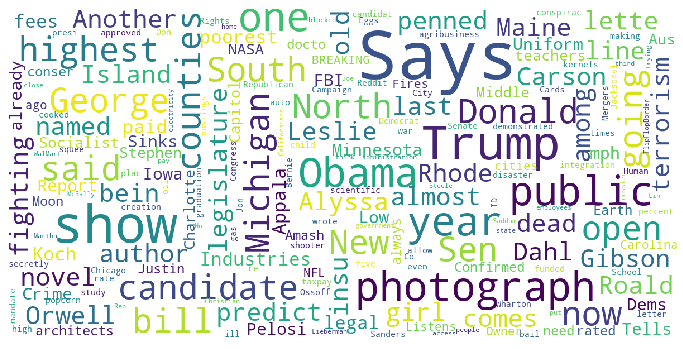

In [9]:
show_wordcloud(data_frequency['claim'])

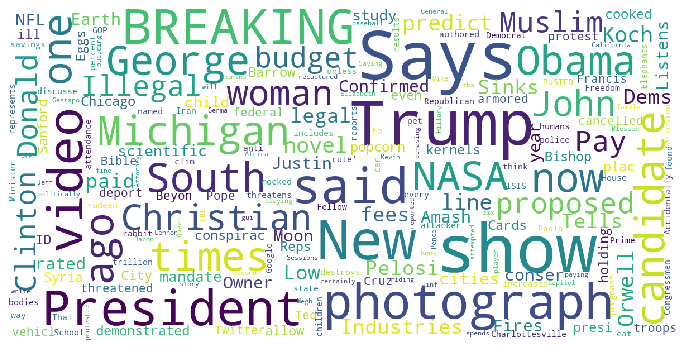

In [10]:
show_wordcloud(data_frequency[data_frequency['label'] == 0]['claim'])

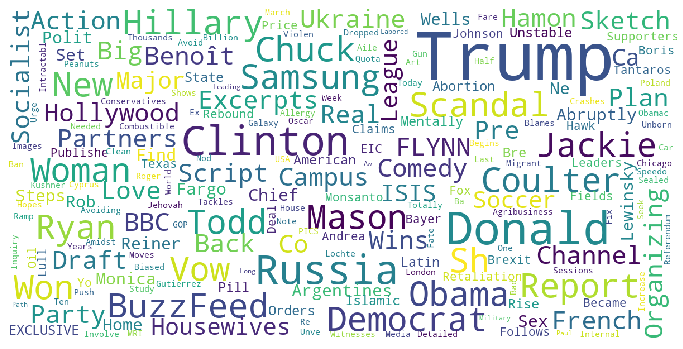

In [27]:
show_wordcloud(data_2[data_2['label']==0]['title'])

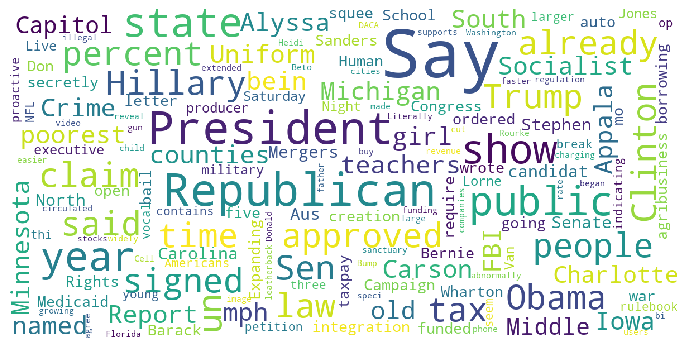

In [6]:
show_wordcloud(data_frequency[data_frequency['label'] == 1]['claim'])

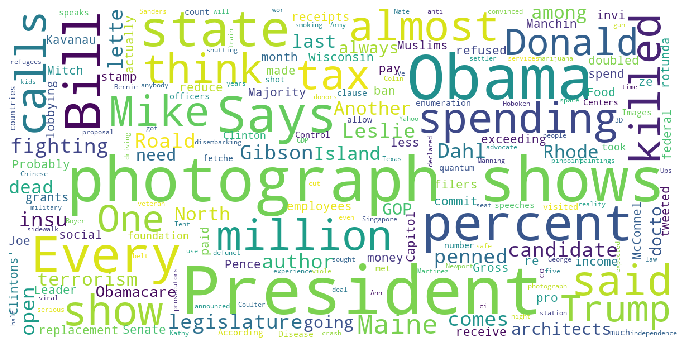

In [7]:
show_wordcloud(data_frequency[data_frequency['label'] == 2]['claim'])

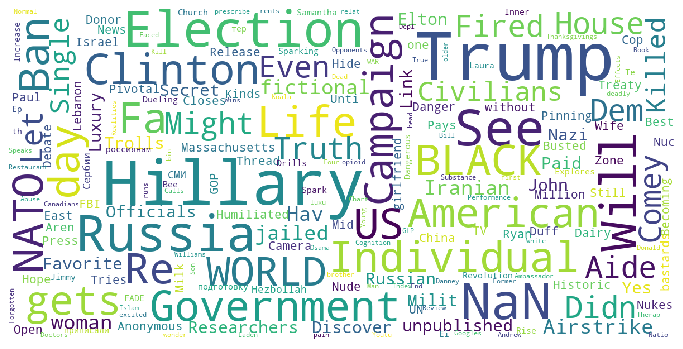

In [28]:
show_wordcloud(data_2[data_2['label']==1]['title'])

# False Claims From Article

Consider, building a model to evaluate articles and give them a truth rating. Would be useful for a case like this.

In [73]:
data_1[data_1['claimant'] == 'Various websites'].loc[46]['claim']

' "BREAKING: 2 Democrat Congressmen On ISIS Payroll Arrested For Treason." '

In [102]:
data_1[data_1['claimant'] == 'Various websites'].loc[46]['label']

0

In [10]:
print(data_1[data_1['claimant'] == 'Various websites'].loc[46]['0'][:100])

BREAKING: 2 Democrat Congressmen On ISIS Payroll Arrested For Treason
ISIS has managed to infiltrate


In [105]:
print(data_1[data_1['claimant'] == 'Various websites'].loc[46]['1'][:100])

Shocking bribe probe hauls in dozens in N.J.
The parade of perps shuffling into a Newark courthouse 


# ToDos

- % False Claims by Claimant
- Submodel -> Truth Rating

# Questions

- What extra data can we throw at it?
- What separates a true and false claim?

In [130]:
lengths = data_1.iloc[:, 7:].applymap(lambda x: len(x.split(' ')) if not pd.isna(x) else x)

In [157]:
row = 8

print(data_1['claim'][row], '\n\n')
print(data_1['1'][row])

"Minnesota, Michigan, Iowa already have 70 mph" speed limits on rural interstates, and "we see that they’ve been able to do it safely." 


Map of maximum posted speed limits on rural interstates
The following table lists the speed limits for various types of roads in the 50 states and the District of Columbia. If a state has different speed limits for commercial trucks, they are listed separately.

In many states, the maximum speed limit that state or local authorities can establish depends on whether the road is a rural or urban interstate, a noninterstate limited-access highway, or another type of road. Limited-access highways are multiple-lane roads with restricted access via exit and entrance ramps, rather than intersections. The limited-access highways that make up the national interstate highway system are divided into urban and rural sections, based on population density figures from the U.S. Census Bureau. The designations may be adjusted by state and local governments to refle

In [140]:
lengths

0     1       2        3        4        5       6       7       8  \
0        482   379   143.0    105.0      NaN      NaN     NaN     NaN     NaN   
1        319  1003   171.0      NaN      NaN      NaN     NaN     NaN     NaN   
2        793  1536   277.0      NaN      NaN      NaN     NaN     NaN     NaN   
3       1157  3455  5071.0      NaN      NaN      NaN     NaN     NaN     NaN   
4       3454   590   234.0    845.0   5647.0    780.0     NaN     NaN     NaN   
5        581  1170   210.0  15312.0  15323.0  15824.0     NaN     NaN     NaN   
6        498   162     NaN      NaN      NaN      NaN     NaN     NaN     NaN   
7        276   245   881.0    248.0      NaN      NaN     NaN     NaN     NaN   
8       1400   204  1153.0    417.0    219.0      NaN     NaN     NaN     NaN   
9        305   203   385.0    905.0      NaN      NaN     NaN     NaN     NaN   
10       847   743   887.0    947.0    499.0      NaN     NaN     NaN     NaN   
11       169   435     NaN      NaN      NaN      NaN     NaN     NaN     NaN   
12       217   351    68.0      NaN      NaN      NaN     NaN     NaN     NaN   
13       747   268   330.0    512.0      NaN      NaN     NaN     NaN     NaN   
14       215   406    77.0      NaN      NaN      NaN     NaN     NaN     NaN   
15        83   173  1793.0    120.0    551.0    524.0   573.0     NaN     NaN   
16       110  1018  2788.0   1065.0      NaN      NaN     NaN     NaN     NaN   
17       625   424   788.0    175.0    211.0    117.0     NaN     NaN     NaN   
18      2378  1534   986.0    463.0    554.0      NaN     NaN     NaN     NaN   
19       368   354    78.0      NaN      NaN      NaN     NaN     NaN     NaN   
20      1648   639   517.0   2151.0    159.0    306.0   693.0   948.0   659.0   
21     11860    78    70.0     58.0      NaN      NaN     NaN     NaN     NaN   
22       578  2833   614.0      NaN      NaN      NaN     NaN     NaN     NaN   
23       354   396     NaN      NaN      NaN      NaN     NaN     NaN     NaN   
24       508  1039   833.0    937.0    297.0      NaN     NaN     NaN     NaN   
25       602   474   700.0   1632.0      NaN      NaN     NaN     NaN     NaN   
26       694   319   778.0   5748.0    405.0    841.0  2359.0     NaN     NaN   
27       982   324   359.0      NaN      NaN      NaN     NaN     NaN     NaN   
28       408   514  1181.0   1361.0    390.0      NaN     NaN     NaN     NaN   
29       462   400     NaN      NaN      NaN      NaN     NaN     NaN     NaN   
...      ...   ...     ...      ...      ...      ...     ...     ...     ...   
15525    910   240   380.0    488.0      NaN      NaN     NaN     NaN     NaN   
15526   1941    92  1044.0   1314.0   1249.0    624.0   965.0  1271.0  2220.0   
15527    271   254   128.0    790.0    218.0    381.0   218.0   381.0   565.0   
15528    374   102     NaN      NaN      NaN      NaN     NaN     NaN     NaN   
15529    758   197     NaN      NaN      NaN      NaN     NaN     NaN     NaN   
15530    598   263   225.0    434.0    335.0    203.0  1339.0  1339.0     NaN   
15531    433    66     NaN      NaN      NaN      NaN     NaN     NaN     NaN   
15532   7622  2372     NaN      NaN      NaN      NaN     NaN     NaN     NaN   
15533   1822  1029  1687.0  11960.0      NaN      NaN     NaN     NaN     NaN   
15534   6436  2636     NaN      NaN      NaN      NaN     NaN     NaN     NaN   
15535    891   529  1560.0    841.0    434.0  15090.0   356.0  1048.0     NaN   
15536    681   231   977.0      NaN      NaN      NaN     NaN     NaN     NaN   
15537    953  4945   446.0      NaN      NaN      NaN     NaN     NaN     NaN   
15538    456   520   311.0      NaN      NaN      NaN     NaN     NaN     NaN   
15539    616  2297   286.0    379.0    484.0   1308.0   254.0     NaN     NaN   
15540   6474   736  1121.0    672.0    530.0    925.0   629.0   594.0   638.0   
15541    729   852     NaN      NaN      NaN      NaN     NaN     NaN     NaN   
15542   1873   789     NaN      NaN      N

In [153]:
data_1

Unnamed: 0                                              claim  \
0               0  A line from George Orwell's novel 1984 predict...   
1               1  Maine legislature candidate Leslie Gibson insu...   
2               2  A 17-year-old girl named Alyssa Carson is bein...   
3               3  In 1988 author Roald Dahl penned an open lette...   
4               4  When it comes to fighting terrorism, "Another ...   
5               5  Rhode Island is "almost dead last" among North...   
6               6  The poorest counties in the U.S. are in Appala...   
7               7  Koch Industries paid the legal fees of George ...   
8               8  "Minnesota, Michigan, Iowa already have 70 mph...   
9               9  "FBI Uniform Crime Report for 2016 shows more ...   
10             10   "Pelosi Sinks to New Low, Tells Dems: If You ...   
11             11  Socialist teachers at South Charlotte Middle S...   
12             12  Says that in the U.S. Capitol, "Stephen F. Aus...   
13             13       NASA Has Just Confirmed Earth Has A New Moon   
14             14  "We are always going to need architects, docto...   
15             15  "Justin Amash is rated Michigan’s No. 1 conser...   
16             16   BREAKING: NFL Owner Listens to Trump, Fires P...   
17             17  Says one year ago, "no cities in the South had...   
18             18  Says North Carolina Republican Senate candidat...   
19             19  Says "the mandate is 71 times that a child’s b...   
20             20  Mergers and integration in agribusiness "squee...   
21             21  Says the Human Rights Campaign is secretly funded   
22             22  A scientific study demonstrated that conspirac...   
23             23  Eggs and popcorn kernels can be cooked by plac...   
24             24  Says Bernie Sanders "was against the auto bail...   
25             25  Congress has approved the creation of a taxpay...   
26             26  In 2008, "candidate Obama, he's not even presi...   
27             27  "This war has been going on for over five year...   
28             28  "Chicago now has City ID Cards which allow ill...   
29             29  The Wharton School wrote an open letter to Don...   
...           ...                                                ...   
15525       15525  "We have an 80 percent graduation rate in high...   
15526       15526  "Democrat Jon Ossoff would be a disaster in Co...   
15527       15527   Reddit postings show the shooter in Jacksonvi...   
15528       15528  “We’re making more than  ever off oil and gas ...   
15529       15529  "The government is trying to now close the Lin...   
15530       15530  The Trump administration blocked public access...   
15531       15531  WalMart has put all their Christian employees ...   
15532       15532  Sen. Joe Lieberman's "home state has a public ...   
15533       15533  “These are the same people that said Saddam Hu...   
15534       15534  "One-third of the counties — think of it, one-...   
15535       15535  Says Rep. Martha McSally "is a #FlipFlopBorder...   
15536       15536  Californians pay "the highest electricity bill...   
15537       15537  Says the Steele dossier "was responsible for s...   
15538       15538  Donald Trump dropped out of the presidential r...   
15539       15539  A photograph shows a musher riding over snowle...   
15540       15540  "5.7 million -- that’s how many illegal immigr...   
15541       15541  "Evidence surfaces of Vatican funding caravans...   
15542       15542   "The average premium across this country has ...   
15543       15543  At an Arizona town hall event, Sen. Jeff Flake...   
15544       15544  A photograph shows Donald Trump, Muhammad Ali,...   
15545       15545  A photograph shows a man mowing his lawn durin...   
15546       15546  President Obama signed a law permanently prote...   
15547       15547  "I haven’t really proposed (phasing out aid to...   
15548       15548  Says Aaron Rodgers "is not t

## Average Number of Support Articles Means Nothing

In [85]:
supporting = pd.DataFrame()
for i in range(0, 65):
    supporting[i] = [0 if i else 1 for i in data_1['{}'.format(i)].isna()]
supporting = supporting.sum(axis = 1)

In [86]:
test = pd.DataFrame(supporting, data_1['label'])

In [93]:
test.groupby('label').mean()

0
label   
0      4
1      3
2      3